In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
data.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

In [5]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sentiment']=label_encoder.fit_transform(data['sentiment'])

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Removing Number and Punctuations

In [8]:
import re
review = re.sub('[^a-zA-Z]',' ',data['review'][0])
print(review)

One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to the fac

In [9]:
#convert as lower case
review=review.lower()
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fa

In [10]:
#remove stopwords
from nltk.corpus import stopwords
review = review.split()
print(review)
review1=[word for word in review if not word in set(stopwords.words('english'))]
print('After Stopwords:\n',review1)

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', '

In [11]:
# Perform Steaming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review1=[ps.stem(word) for word in review1]

review1

['one',
 'review',
 'mention',
 'watch',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'mani',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 'prett

In [12]:
review2 = ' '.join(review1)
review2

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [13]:
#Converting vector form

corpus1 =[]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

print(review2)
corpus1.append(review2)
print(corpus1)
x = cv.fit_transform(corpus1)
print(x.toarray())

one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch dar

# Apply all the above preprocess for whole dataset

In [14]:
import re 
import nltk
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,2000):
    review=re.sub('[^a-zA-Z]',' ',data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch dar

first let get thing straight anim fan alway matter fact use watch speed racer time preschool b like sever b movi hilari c like godzilla movi lot br br move movi first come seem like go usual b movi crappi fx sudden boom anim come movi goe wwwaaaaayyyyy downhil br br anim bad cheap even wors rememb speed racer crissak fact cheap one scene movi vividli rememb bunch kid run school kid fx terribl dinosaur look wors godzilla addit transit live action anim unorgan dialogu voic especi english dub view horrid beg dad take tape dvd vh player thing kept surviv crack joke comment like robot joel mike mst k pick season honestli way bare enjoy movi surviv time br br heck plan show anoth fellow otaku pal mine halloween b movi night stupid pretti pain watch unintent hilari time give movi improv origin go give br br accord grade scale mean pretti much bore bad fun count three unless find way make fun becom fun count
worst movi saw worldfest also receiv least amount applaus afterward think receiv recog

watch film realli expect much got pack film pretti terribl way fiver could expect know right terribl movi stretch interest point occasion camcord view nice touch drummer like drummer e damn annoy well that actual problem bore assum attempt build tension whole lot noth happen utterli tediou thumb fast forward button readi press movi gave go serious lead singer band great look coz half mention beauti hell lot thought look bit like meercat even mention killer even gonna go worth explain anyway far concern star london reason watch except london actual quit funni act talent certainli seen lot wors also seen lot better best avoid unless bore watch paint dri
bought film blockbust sound interest bit ranma esqu idea someon drag around skeleton cute girl mini skirt back restrict view sticker thought go sweet least sincer come age stori weird indi edg wrong br br watch wonder got restrict sticker sinc hardli foul languag littl violenc closest thing nuditi honestli usual go around hope girl nightg

averag surprisingli tame fulci giallo mean still quit bad normal standard redeem solid build nice touch neat time twist issu vision clairvoy br br genr well known weak full gear banal dialogu wooden act illog plot point final goe much long denouement prove rather lame shall say limp affair br br fulci iron handl giallo norm amus though yellow clue wherev look br br limp killer
return th chamber one classic kung fu movi shaw produc back whose genr equival spaghetti western hollywood protagonist gordon liu counterpart western clint eastwood digit remast new print made fantast film fest present shaw scope like good old day br br film simpl stori good versu evil told act less sum narr martial art film era br br act one set premis worker dye mill small villag unhappi lot wage cut incom manchu gangster much exploit none martial art skill take gangster boss first minor success get liu imperson highli skill shaolin monk one best comedi sequenc rous got expos push limit credibl imperson one man

watch fingersmith stun see averag rate show br br plot difficult follow seem charact develop randomli appli br br actor adequ process attempt creat twist turn charact render entir one dimension happen stori realli fall flat becom tediou br br case anyon see predict lesbian underton mile way hammer home banal term end film br br end scene disappoint phone anyon sat back went ohhh carpet muncher along must even br br two star tonsil hockey earlier scene least bit raunchi none rest
let begin br br movi origin cronenberg movi would usual appear br br intent see certainli jjl one favourit actress love usual cuti br br would say favourit movi still quit interest entertain follow br br rest cast extrem impress kind miscast star array br br recommend confid
besid bore scene oppress dark movi tri portray kind moral fell flat messag redeem qualiti top think could make librarian look unglamor
unmarri woman name stella bett midler get pregnant wealthi man stephen collin offer marri sens oblig turn

last hard men find jame coburn outlaw long sentenc break free chain gang friend head mexican border jail safeti coburn mission reveng kill peac offic brought process kill woman br br peac offic charlton heston retir know coburn explain daughter barbara hershey coburn hole shack involv waco like standoff indian woman kill hail bullet fire someth proud collater casualti manhunt br br lest feel sorri coburn let us know full well evil man truli heston usual stalwart hero act honor last hard men go jame coburn blow everyon els screen br br coburn get bright idea make sure heston trail kidnap hershey take indian reserv white author touch know heston make person br br coburn gang includ morgan paull thalmu rasulala john quad larri wilcox jorg rivero heston chri mitchum along son law br br last hard men one nasti brutal western andrew mclaglen direct think may project origin intend sam peckinpaugh sure show lot influenc liber use slow motion accentu violenc lot br br littl peckinpaugh lite las

periscop librari sinc first arriv vh sinc acquir dvd digit cinema br br quirki flick go militarili overboard either pro con first foremost comedi vehicl main charact quit surpris sequel never offer br br movi gain follow border cult obsess even among young becam awar visit uss drum mobil alabama group cub scout grandson among taken role movi plan reliv overnight board br br fun romp make proud navi hollywood rare compani br br thank kelsey grammar lauren holli rob schneider make could otherwis unremark movi great entertain
came alreadi seen film curiou other say br br feel realli profus apolog canadian film ever cross eye moment hear cure retin bleed report everi dozen case br br like everyon els rent movi believ stupid b movi ripoff blade thought sure could use good laugh stupid movi give creator film one posit comment creation thank remov rec xx xx xx bottom right hand corner screen see would distract see movi br br record saw movi watch dialogu incoher scene took place grandmoth tra

despit later claim earli talki melodrama littl common citizen kane biopic ruthless human fiction plutocrat told flashback hop around time scriptwrit preston sturg show none later gift sparkl dialog none myriad cinemat innov kane evid still watchabl young spencer traci old man makeup make look like well old spencer traci show depth author colleen moor littl past prime physic well match play multifacet woman behind man also helen vinson one treacher femm fatal movi histori send final third ecstat soap opera reverber surviv print jumpi miss audio snippet plot hole left open would know whose son sleep music aw hokey quit fascin
best version far see true bront work dalton littl tough imagin rochest jane eyr declar handsom act overcom zelah clark pretti also complet believ jane eyr product lengthi watch well worth nearli direct quot book script want first true romanc literatur way see everi copi movi read read origin film may seem littl date never anoth like
appar peopl wrote back box bother

revolt zombi prove director revamp recycl idea necessarili make lightn strike twice br br halperin brother respons horror classic white zombi made trite piec garbag mere year later cash popular even recycl close up lugosi eye previou film court battl white zombi film right owner want halperin abl use word zombi titl word thing could help film everyon know bad film make much money simpli word zombi appear titl know victor halperin capabl year make uninterest film insult seem never direct anoth horror film debacl zombi seem true walk dead simpli hypnot victim br br wanna creat mind control armi zombi readi crack egg includ br br lame plot man fall love scheme woman play heart becom engag make friend love jealou send man spiral mad tri use zombi mind control techniqu chang thing advantag attempt win woman worth spit br br includ one blatantli obviou plot develop ever seen blind stupid see end come act even good movi make racial insensit king zombi appear doubl bill dvd bought seem like at

begin let get someth chest huge fan john eyr first film project shadowchas film b grade cross termin die hard may work cinemat geniu huge entertain action film becam cult hit spawn two sequel spin br br judg juri begin joseph meeker convict killer sent death row follow captur call bloodi shootout seem like poor name kill spree meeker kill three peopl tri rob conveni store led electr chair amus scene meeker talk priest live sex meet one true love kill shootout express reveng person kill michael silvano wash footbal star spend day watch son alex practic footbal high school team end harass son coach execut meeker return reven kelli perin call hamburg without fri whose sole aim get reveng basic mean make silvano life miseri br br let point fact judg juri true horror film supernatur action film meeker chase silvano use abil chang form amount david keith dress everyth elvi imperson french chef accent bad moustach drag queen clown stand comedian shotgun fire explos round invulner death althou

movi perfect adapt english flick unfaith ashmit play role richard gere emran olivi malikka perfect cheat wife role lane chang second half film adapt indian mass br br even movi got full trace unfaith though catch origin cheap soft porn bollywood lover mallika show lot skin anyon dare show emran role like even nicknam serial killer futur indian director plan remak english movi look feasibl plot indian censor though film bomb box offic actor got undu recognit futur director littl care remak oscar nomin film br br said famili film take extra caution watch home famili
robert altman downbeat new fangl western edmund naughton book mccabe overlook time releas past year garner sterl critic follow asid complet convinc boom town scenario charact merit much interest pictur look intent brackish unapp beard warren beatti play turn centuri entrepreneur settl struggl commun outskirt nowher help organ first brothel profit start come beatti natur menac citi tough want part action altman creat solemn wi

one hideou film find lifetim tv portray abhorr behavior disgust woman empathet manner along nasti film burn bed enough monster film take disgust crimin attempt show viewer bad person give us break question filmmak letourneau man vili year old girl would made pictur sympath empath person answer hell br br imagin switch gender film see other consid worthless piec garbag gender switch would attempt empath crimin instead like treat portray monstrou hideou man prey upon young girl lascivi behavior land prison brainwash victim suffer stockholm syndrom reason letourneau receiv treatment film virtu sex br br let call spade spade letourneau pedophil plain simpl if and but crimin belong prison deserv deris contempt certainli piti empathi
premis movi decent enough sub par act bland dull br br spoiler film work natur death accident although murder like guy set also flashback secret reveal sort make event like justic degre emot film first minut woman call sister hear messag dull bore br br polish b

though heard cama de gato worst brazilian movi decad watch give chanc first time director produc writer alexandr stockler manag make debut featur shot video us though look even cheaper begin imagin went final get exhibit theater big sponsor product compani behind watch realiz whatev chanc readi give cama de gato shrink zero within minut unbeliev preposter verbos ideolog fanat technic catastroph attempt portray brazilian upper middl class youth bunch spoil neo nazi hook bad sex drug violenc made look like closet gay made visibl trace talent imagin expertis notion structur visual aural recal worst amateur stuff find youtub last nineti two count em minut unrel hysteria clumsi even funni bad br br seen stori bore young guy want fun go parti take drug everyth goe wrong gang rape spank murder accident death fall staircas mother one boy culmin boy decid burn corps girl mother garbag landfil moral liter garbag get film heavili influenc larri clark especi kid bulli clark film though also morali

read ann rice novel movi base know mayb read book cheaper rent queen damn probabl better health movi necessarili bad health book relax certainli exercis activ part brain movi count number page ann rice read one hand see movi interview vampir get feel write realli good novel plot movi hint whole sea deep interwoven vampir histori br br still stuart townsend voic narrat get heck lot annoy brad pitt vampir narr ever tell queen damn limit product resourc bare give enough flesh ann rice storylin interview decid go lace eleg queen reli low budget special effect tri realli hard taken serious one see origin novel potenti movi product team focus attent wrong place costum rock roll stage could replac blood eerier soundtrack br br howev give credit credit due soundtrack excel korn disturb sick bob noggin like butthead br br film open cool goth rock zoom splice montag first ten minut direct degener quickli movi long director realiz enough time enough money ann rice novel justic result mediocr vamp

ludicr angel year old annakin turn whini brat year old annakin somehow seem appeal amidala year senior year old jedi warrior hero annakin coupl bad dream take slaughter children friend entir framework exist crazi old man convinc preciou wife might realli die b prevent ludicros squar br br think peopl like movi pay attent stori ridicul charact unbeliev liter pervert sens fantast wonder etc br br obi wan kenobi wise kind anchor entir seri climax hack annakin leg let burn lava leav suffer anyon think littl charact mention pretti stupid take chanc live turn br br expect least stori show consist charact plausibl motiv none stori could written year old br br oh yeah cgi pretti cool
scotti grant cramer would go star great b movi killer klown outer space agre help three middl age guy learn dialog ladi bad comedi bad lingo meant good bad bad likabl charact includ limit kid freakiest look guy sinc friday th part girl lead men goe hissi fit want touch token fat slob would sex comedi without fat s

movi without doubt perfect peopl rate film low grade good plot anyth like that ridicul say jacki chan movi bad plot like say porn movi bad plot watch jacki chan fight scene action much concentr good stori anyth like look make movi compar american film era even later realiz jacki chan movi top fight scene realli good plot american movi good plot shitti action scene compar jacki chan time porn watch porn jacki chan watch action think peopl rate bad plot think that smart movi critic would rate good movi way see good movi movi keep entertain sure middl movi bore bore put way rest action scene stunt much pay chang way american action movi creat even stollen scene movi want true man true entertain watch movi mani jacki chan he pure everyway liter make american movi look like walk park even today movi american movi reli much special effect safeti wire stunt doubl much polic stori mani jacki chan film piec work true entertain goe talent masterpiec
saw london film festiv last night appar shorte

one starewicz longest strangest short film follow toy dog search orang becom anim tear mother girl long orang dog come upon orang fall back car way sold night must protect orang come enter devilish nightclub featur mani bizarr scari charact help stuf cat dog get orang back littl girl save terribl scurvi death mascot featur new techniqu yet seen starewicz film addit sync sound mixtur live action stop motion anim make new twist starewicz old style puppetri live scene move car peopl feet walk puppet sit concret sidewalk impress fresh honk car cri street vendor noteworthi due fact small studio shift sound costli starewicz util new technolog seem like old hat new puppet charact film frighten contribut devil club scene twigss newspap shred come life skeleton dead bird lay egg hatch skeleton chick charact come fli pat pan rock hors new edit techniqu use quick zoom accomplish edit speed pace might slow scene overal starewicz abl updat style film make meet demand new audienc make film one best 

base edgar rice burrough novel earth core provid littl mean escap give brain rest victorian scientist dr abner perri peter cush invent giant burrow machin american partner doug mcclure use corkscrew way deep earth explor mysteri may hold soon discov lost world subhuman creatur conflict prehistor monster br br cush come across absent mind professor point annoy instead bold adventur come across effemin hand mcclure overact enough make also laughabl carolin munro play pretti princess dia refus leav world near center earth also cast godfrey jame cy grant michael crane
seen film least time still excit act perfect romanc joe jean keep edg seat plu still think bryan brown top brilliant film
show make absolut sens everi week two ladi go estat garden everi week without fail somehow stumbl upon murder everyon own big hous larg garden involv murder right even somehow happen stumbl upon murder murder smart thing tell polic know peopl actual someth everi week two fool go around pollut evid commit c

black comedi alway easi sell everi get black comedi huge success like fargo exampl usual often find big audienc peopl seem either set mind comedi seriou mayhem seem big market good mixtur throw momma train fairli decent hit yet peopl seem rememb much day age danni devito hit one way park back br br devito play odd mamma boy name owen look rid outrag overbear unpleas mother still live mother play ann ramsey pass away shortli releas quit caricatur loud ugli rude overbear though owen hardli seem like could take care want desper mother of fantas truli weird scene clearli gut actual billi crystal come crystal play larri donner owen creativ write teacher nearbi commun colleg larri paranoid would intellectu novelist claim ex wife stole novel made million current tri write new one cannot even come decent first sentenc night owen hear larri wish ex wife dead outburst school cafeteria borrow idea stranger train owen decid travel hawai murder larri ex wife appear done expect larri return favor ki

must see documentari movi anyon fear modern youth lost tast real life adventur sens moral dariu goe west amaz roller coaster stori live live dariu crew embark journey lifetim dariu duchenn muscular dystrophi diseas affect muscl bodi confin wheelchair need round clock attent could crew young friend possibl manag take mile round trip west coast back watch movi experi up down great adventur laugh cri crew cope unimagin challeng along way enjoy final triumph arriv back three week later home town raptur recept great surpris
messag world brink war disregard mass mythic citi everytown repres england gener could well stand nation world war final arriv ravag continu anoth five year time everytown complet destroy ad desol toll human wander sick pestil continu anoth four year br br thing come balanc fatalist futurist world view scienc hold hope reviv civil wing world concept play bit corni though spokesman cabal raymond massey unwav mission dedic caus fail other follow messag continu reinforc thr

new orlean illeg immigr feel sick leav poker game win smalltim crimin blacki walter jack palanc chase blacki men raymond fitch zero mostel poldi guy thomajan kill blacki bodi dump sea autopsi famili man lieuten command dr clinton reed richard widmark u public health servic find dead man pneumon plagu caus rat need find type contact man within forti eight hour avoid epidem citi mayor assign skeptic captain tom warren paul dougla help dr clint find killer infect plagu inocul br br panic street disclos simpl stori still effect great villain engag plot becom date fifti seven year jack palanc perform despic scum debut camera work tri escap zero mostel still impress vote seven br br titl brazil p nico na rua panic street
box origin pick movi back rent soon learn dupe thought movi would someth like road trip eurotrip american pie deal wrong movi one dumbest seen long time unrat version teas watch complet disappoint act terribl sound effect gaudi appear low budget entir set take place build go

thought movi stun complet outstand perform valentina cervi artemisia gentileschi br br cervi portray artemisia beauti tent yet confid manner hand map idea move model place passion artemisia give art spectacular watch br br although charact overtli beauti made film realist facial hair cloth perfect point time br br overal thought film fantast
consid bit connoisseur box movi one thing prevent call gentleman jim best box movi ever made robert wise paul newman flick somebodi like movi might number gentleman jim close number br br movi chronicl rise jame j corbett also show sport box crucial time transit late box move away brutal day bare knuckl rule gentlemanli day glove marqui queensburi rule sport move away day illeg spectacl toward time accept respect br br gentleman jim realist look day romantic ye even bit hokey time alway delight errol flynn perfect gentleman jim realli gentleman mere fast talker work class famili alexi smith quit ravish upper class woman love hate relationship know 

everi high prais word fell way short height movi movi true exampl psycholog horror movi br br plot seem bit confus first view definit explain bit go realli want view second time second view start join piec togeth know amaz movi br br word advic slasher flick fan stay away movi dumb ass teenag slasher movi switch brain sit front screen see big b bs lot blood br br want heighten psycholog horror factor movi watch alon great home theater system support dolbi digit dt ch without ill manner friend crack joke realli tens situat forget switch light br br point differ aspect br br direct act atmospher sound effect br br total
ken burn basebal decent documentari present clear origin game great depict basebal earli year hero plenti movi basebal fan said film sever glare flaw br br hour simpli long human attent span clear burn stretch film fit nine inning concept even tight hour pace everi segment slow almost moros music alway nostalg wist basebal ever excit fun everi player accomplish present fo

cant believ peopl like movi thought funniest movi ever seen b c mel brook biggest fan know almost word get discourag censor play famili channel one favorit movi dont know one would disagre thank kristina
flynn known mostli swashbuckl role bedroom antic take differ tack film work beauti play real life box champ jim corbett flynn turn charm full blast make way stifl san francisco bank teller celebr pugilist set one eye societi deb smith best pal carson attend illeg bare knuckl fight arrest along score men dog includ promin judg next day get chanc via smith gain entranc judg privat club use opportun weasel way good grace exclus member land spot club resid boxer unusu adept skill sport soon take comer includ world champion john l sullivan bond flynn downright magic epitom charm charisma appeal role look terrif especi hangov scene hair muss wear white union suit virtual stuntwork impress line deliveri delici credibl sympathet time duplicit rascal smith exud class tast everi pore good match 

incomprehens dread mishmash probabl notori roman emperor went insan leav infam parti orgi ruthless kill path know sever version base min one watch fathom possibl make differ lift rest movi muck br br heard long alleg shock content sex nuditi honestli much bore blood bewar technic product amateurish well truli shock everyth look plain simpli like junior film school flunk project camera work hopelessli inept full strang zoom fail frame confus pan mostli look like huge theater stage complet graini cheapish photo qualiti light color scheme terribl uneven day night outsid chang scene meant shot edit final sin make confus mess everyth randomli jumpi cutaway continu flaw random transit destroy chanc momentum stori progress involv potenti interest dialog equal interest true histor stori fault distract much tragic br br stori mani possibl great one gargantuan burnt fellini like turkey good gobbl laugh peter tool make memor tiberiu oh ye bring us big name actor like line one one ask get free acc

endless bound inhuman kind never fail stun truli astonish stori horrif abus larg unheard popul compel well document enrag american constantli humili countri behaviour anoth long catalogu intern debas suck probabl first john pilger documentari seen immedi made want see els done complaint reason gave film pilger show us travesti appal collabor us uk govern demand viewer citizen complicit inact make suggest help know britain america made nearli imposs citizenri take part govern do gestur right direct might help island caus
flick bad beyond belief even independ low budget film well suck even believ even troma would put crap fan troma flick year toxic aveng squeez play rockabilli vampir name lloyd come goe way beyond boundari tast featur worst act imagin think would possibl find unemploy street peopl could good oh wait mean charact neg charisma luck produc director film huge karmic debt atroc special effect peopl beyond terribl act horrid special effect dialogu absolut traumat ear script fu

appar second remak film film mani way remind later film yank oxford film concern conceit blow hard arriv one top school world ultim show blow hard slowli learn teamwork decenc film william hain tom brown main rival bob play franc x bushman support role jack pickford alway rememb brother mari three pickford come best sympathet loser becom tom pal actual decent scene well dramat moment big game standard clich movi done mani time sinc offer surpris howev pleasant film enjoy view br br opinion better silent colleg film tri harold lloyd freshman footbal scene frankli excit harold far likabl sympathet annoy tom brown freshman probabl best colleg pictur find era anoth reason brown harvard lesser pictur william hain play essenti unlik bombast charact plot westpoint smart set among other seen one film seen well made certainli origin rehash film anyon give film score strongli advis see film br br check saw small film highest rate film imdb talk rate dozen dozen better film film got anyon guess
m

pathet attempt use scienc justifi new age religion philosophi two noth much said quantum physic mess plain wrong br br exampl quantum theori support idea eastern religion realiti illus well world subatom never definit predict particl locat specif time give odd precis one spot one time also act observ seem affect event solid particl pass barrier far accur assert mean believ sincer enough could walk wall could inde complet poppycock instead theori assert level possibl walk wall mere chanc noth belief also keep walk wall etern ever even remotest chanc pass wall odd astronom br br one exampl misrepres scienc much annoy narr involv unhappi photograph play marle maitlan halfway pictur becom confus incomprehens someth neg thought lead addict self hate may truth quantum physic noth br br plu string theori hot new thing physic nowaday instead wast time dreck suggest rent eleg univers amaz seri done nova pb give histori physic newton graviti ed witten theori hour long episod quantum mechan expla

disappoint movi left feel jip time mental energi quintessenti woodi allen film neurot upper class manhattanit debat whether cheat spous woodi seen charact alreadi seen storylin ten time alreadi creativ go need open eye look around world chang dramat sinc anni hall need chang along br br far interest funni scenario appli brand angst neurotic tri instead rehash old slop br br hear woodi allen new project come noth come expect old standbi coupl grow tire end cheat depress old old br br woodi want win fan back understand sens humor intellig stimul insult
movi ultra lightweight fluff predict begin end knott vehicl incred mr limpet much better knott charact nearli incompet ignor perform tone none trademark goggl eye stare although may someth replac movi cartoon fish knott made live play likabl imbecil much bob denver neither realli seem abl break type role assum simpli typecast probabl slouch wild stare high pitch voic john ritter knott work three compani abl transcend genr branch success dr

like ghost stori good ghost stori bump night voic cannot explain see mani special efx ever grip today film time find real gem gotta turn clock back time writer director realli use head creat realli good ghost stori one rare pilot episod tv seri ghost stori call new hous one scariest film ever saw noth sinc even compar remak go hollywood one one special efx origin episod right creepi hell lucki find final dvd today rare hard find ghost stori even come close origin haunt georg c scott changl wish someon would ghost stori like
okay watch movi twice research heavili net ask sever peopl opinion even gone length read origin sheridan lafanu classic carmilla book movi suppos base feel best way review movi describ game play whilst watch plot movi seem make sens plot book br br laura live castl syberia father mr de lafontain carri live bliss peac one day get letter gener man made mission life aveng daughter death make claim supernatur power work explain visit soon meanwhil chanc encount strang w

like sci fi monster ancient legend love movi br br special effect far best seen sinc juarass park hit big screen year ago act may littl less desir stori line effect adequ compens br br wish seen movi theater screen instead inch big screen tv br br like non stop action awesom visual tast myth lore see movi
rather silli littl film may love br br although rather corni clich time nonetheless work make good clean fun five team engag scaveng hunt battl wit win night contest sheer joy know best team br br notabl sever screen debut includ david naughton first film role dr pepper pepper commerci major hit american werewolf london also featur paul rueben believ first pee wee herman esquir roll year becam known last least mr spin citi alex keaton michael j fox get first film role fan rememb stephen furst flounder anim hous outsid name funni charact br br doubt ever made dvd still probabl vh copi float around might even catch late late show sometim worth watch may hate may also becom quirki littl 

edmund low remind somewhat warren william head nice cast interest littl mysteri move brisk pace run littl hour br br dougla walton play unlucki jockey appear intent demis hypnot anyon suspect includ good number support cast everyon virginia bruce kent smith frieda inescourt gene lockhart jessi ralph benita hume rosalind ivan h b warner ad bonu nat pendleton dimwit detect furthermor get load art deco set decor fanci interior wealthi home must set use mani subsequ film br br plu side mysteri complic anyon follow plot reason assur baffl suddenli clear detect philo vanc final confront murder give film nifti five minut unmitig suspens br br nice done pass time entertain manner
movi lame funni plot even make sens scientist work fring scienc open doorway anoth dimens mayb hell daughter get suck someth one day appar reason come back big breast wear skimpi outfit guess demon dimens made main charact guy want marri girlfriend gay obvious interest new girlfriend stumbl upon witch spell book want 

oh good would never thought possibl see thriller wors domest disturb soon arm rotten plot terribl edit stilt act headach induc style sorri word sanctimoni kind movi almost forc evalu entir genr film bad even thriller condemn complet failur seem littl better br br sanctimoni terribl film also succe difficult task rip better movi pathet job right main titl noth blatant attempt reproduc one se en impress someth smell quit right soon movi start seri corni wanna hip quick cut full gori imag bombast color knew smell come br br turn two policemen rather policeman jim renart michael par policewoman dorothi smith jennif rubin investig murder spree vancouv serial killer known monkey killer menac chill nicknam uh work method kill quit lot peopl see nut appar work follow proverb see evil hear evil speak evil cut eye ear tongu victim far six eye six ear three tongu ingeni fashion renart smith figur monkey killer probabl go kill three peopl well probabl want complet number suddenli film focus tom ge

younger oh watch barney first time like back exactli brain either look back see horribl show barney realli first everyth show creepi barney main charact horrend foot tall talk purpl dinosaur teach year old imagin shudder b j know think name smaller yet creepier yellow dinosaur put supposudli cool fact exact opposit watch episod b j dumbl trudg slightli turn back cap make funni joke want scream babi bop oh oh god vomit oh oh oh anyway babi bop worst idea charact ever green triceratop dinosaur carri yellow blanket remark hee hee hee barney prais cri super deeee doooper make hard sit episod seventh grader learn shape manner br br friend make show truli horribl
steve mcqueen certainli lot loyal fan certainli charismat fellow one charismat big screen ever knew even mcqueen save turkey film shot look like browni camera actual locat st loui br br mcqueen new kid crimin record brought plan bank heist one gang broad hint gay relationship go young steve david clark like heist member mainli lack 

comment lot stereotyp charact absolut ignor colombia realiti aw mise en scene poor color choic funni suppos comedi expect laugh distend music besid nonsens scene poor actor direct see somewher peopl mean interpret know least good see call film imposs guess get tire music comedi rhythm good rhythm rap sing final credit pathet etc etc long time seen movi bad
movi riot cannot rememb last time great time movi seen good comedi time usual pretti funni one wall wall great line think best show last movi laugh hard much movi non stop end minut sentiment plot clean constant barrag one liner goofi situat like see leav theater like zucker movi get joke first time around see two three time get br br far actual film goe could use better edit choppi time forgiv charact great like adam sandler movi tri funni everyon els suffer around butt joke think rememb main charact year come likabl victim movi also thank god got year old actress play girlfriend catherin keener play sweetheart film wish women like 

joyou world creat us pixar bug life immers univers could document enjoy film precis univers could document world anim forgotten plenti exuber world anim offer right hand bug life warm remind walk film equal warm feel sens satisfact deriv high calibr film product br br pixar second anim featur sub group disney made spectacular debut perhap entir inadvert mark film world three year prior landmark movi toy stori movi defi convent invent breath new life anim defin whole new level excel return sophomor effort honest draw creep sens cynic us prior see film br br film ant well walk insect bug world cover bug life ant focal point film human focal point drama romanc insignific speci anim ant act protagonist movi let alon provid entir premis featur film sure jest howev forget toy stori bunch toy box item abl becom grandest inspir lovabl bunch anim hero villain ever concoct guy pixar manag pull feat manag turn bunch dirti miniscul bug endear pleasant gang vermin probabl ever encount br br entir a

stori show good realli depress hate depress movi ri chard great realli put top notch perform girl play sister realli awesom gorgeou serious thought carmen electra saw imdb profil say anyth bad peter galleghar one favorit actor love ann rice current read vampir chronicl glad saw movi read book littl real prefer lestat loui witti littl tiff struggl slave eartha kitt creepi charact movi ruin could bare stand watch rest show sorri ambigu want give anyth away sorri type show
first let comment like movi special effect fantast rare feel like watch video game last nice thing say film fact would like everyon read take note even put word hard write review without swear br br innumer complaint film four major complaint jump mind first major complaint incred cheesi plot twist call sinc peopl probabl saw come mile away loi year old son turn super power child superman cri super child throw piano lex henchman save mother almost got left theater singer could made much better superman movi without reso

im type person alway goe horror section pick film pick five across eye disgust film thought stori line point could enjoy made skin crawl think peopl like watch film encourag violenc hell low budget rubbish think could done better think worst film ever seen life bother watch actor rubbish camera aw pictur bad sound scratch think littl bit like cheep rip baler project work foul
seven up compar bullitt chase scene come anywher near match bullitt bullitt begin build build build mcqueen leav seedi hotel get mustang park embarcadero freeway torn notic charger sit nearby know see someth spectacular moment mcqueen start car begin best car chase sequenc ever film ad terrif lalo schriffin rememb correctli sound track goe long time actual hear first tire squeal shot mcqueen mustang suddenli appear bill hickman rear view mirror unmatch visual impact hickman look surpris doubl take realli add effect cours san francisco unmatch set car race hill around bend also bullitt film car still hot mustang gt

believ shakespear explain read beauti think ladi doth protest much whole thing sound author tri convinc site profan literatur write time period connect bibl number time howev think least three refer top head lend histor accuraci event contain bibl anyon skew data prove anyth like make true custom chang word definit chang time look english german obvious common root noth stay alway grow chang bibl mani differ translat king jame version one found best come kind research king jame version notic certain word written ital word ad translat drop mean entir vers chang write around time christ written without space without punctuat without paragraph without numer vers write look like one long word translat ad exampl would read godisnowher read god nowher read god string letter two entir differ mean mani biblic research use lexicon assist translat provid word word translat origin arab greek hebrew depend languag scriptur origin written also interest note translat symbol logic prove god exist pro

thought rotj clearli best three star war movi find surpris rotj consid weakest instal trilog mani vote seem like rotj best profound plot suspens surpris emot especi end definit episod movi person like empir strike back lot also think slightli less good rotj sinc slower move episod feel much suspens emot third movi br br also seem like read surpris review reason peopl cite rotj inferior film two plain ludicr insignific reason compar sheer excel film whole heard mani strang reason yoda die b bobba fett die c small ewok defeat band stormtroop darth vader reveal br br would like debunk reason believ miss point complet first care bobba fett die georg luca want die want die get wrong fan bobba fett made cameo appear luca intent make central charact film star war fan made name even mention anywher movi go credit find bobba fett name judg rotj minor charact die bit much think secondli mani fan like yoda die sure moment period movi happi see die either make movi realist good guy stay aliv reali

great cast big name star like tyron power henri fonda randolph scott nanci kelli henri hull brian donlevey bunch lesser known name shorter role also technicolor one movi made br br bad news regrett say much posit stori portray jame boy total posit light hollywood done ever sinc crimin alway shown good guy beyond film glamor made enemi railroad peopl viciou human be latter exagger much preposter well film world evil good good bad br br hey hollywood news flash jame boy crimin realli look
rememb watch seri avidli everi saturday even highlight week love everyth locat costum actor wonder music clannad still legend album love way solv problem michael pra leav creat anoth robin time earl huntingdon believ legend sever robin mediev time anoth thing love fact fill young actor sure robin men would young peopl live long day robin alway look old kevin costner ridicul accent look like robin granddad sad thing end shame least done one special tie loos end give happier end
normal write review film s

first mexican werewolf texa werewolf movi titl bullcrap stori actual chupacabra kill local villag littl town furlough texa suppos distributor renam origin titl would make extra buck someth guess actual work reason bought piec crap sound stupid anyway movi good actual bloodi aw expect anyth els bought low budget horror movi chupacabra monster enjoy low budget horror bad dialog actor gore check movi must warn movi realli baaaaaaad br br movi worst act ever seen actor tri hard get complet ridicul almost never say line normal way alway complet wrong tone everyth say stupid almost look like freakin parodi like shot scene one singl time happi worst blond girl suppos play bimbo worst never seen actor bad seen pteradactyl even boyfriend die stop bimbo hate br br shot movi actual quit good one shot daytim pretti decent low budget project movi shot night chupacabra strike light way dark gore scene short realli grizzli violent effect pretti hilari realli way like chupacabra look pretti mess easi 

unlik review born born may th despit life much style kid playstat play zelda ne etc movi hold special place heart alreadi despit year old time write review style earli childhood watch mani tv show saw mani movi kid see movi one one greatest br br start lo angel home alvin sevil simon sevil theodor sevil david sevil david chipmunk adopt father rush get airport go busi trip around europ taxi almost chipmunk help pack talk alvin express come dave see world even though technic dave go europ alvin appar america europ qualifi world david leav chipmunk care miss miller much displeasur boy soon dave airport chipmunk left home miss miller later local caf chipmunk play game around world day chipett brittani jeanett eleanor lose game brittani hot air balloon eaten sky crocodil alvin get argument brittani would realli win race around world two diamond smuggler sit nearbi tabl klau claudia furschtien overhear argument need safe way transport diamond world decid fool children deliv set race around w

cannot hate show old better tech tv hit brick channel reformat new show step attack show replac screen saver co host begin kevin rose kevin pereira sarah lane brendan moran came someth co host well mostli prerecord piec show kevin rose decid leav show eventu contest see would third host pan reason br br eventu learn imdb messageboard sarah lane brendan moran move hey read two got marri big secret new femal co host hot opinion olivia munn hide someth top wear sarah lane perfect bodi afraid show br br ahem sorri br br attack show deal everyth young peopl want know music movi comic book internet televis great show want bother scour net wast time watch mtv get want aot segment bit funni regular guest contributor industri well guest rang insignific internet star actual big name br br even though host geek like still found attack show entertain even latest lineup
worst dcom seen ever well mayb bad smart hous bad act stori fine effect suck br br fake good fight scene brother shen probabl scen

way though think oh god begin thought right might averag act plot part atroci br br everi part predict even though first movi seem bare larg resembl ring half decent movi seem take good thing first made terribl bit made everyon audienc wet eg part geller fall build stitch girlfriend keep tell quiet kept comment bound happen next time less right br br go hous make come make sens poor excus lot kill realli depth seen br br see everyth come left feel point watch oh she behind see one come yawn br br sure peopl must thought oh know carri knife round least tri fight back instead eaten someon hair best movi mildli scare mean mildli cri credit roll exhal short oh thank god alreadi wast time money pointless plot less sorri excus sequel
high school student commit suicid shown taken live reason known time skip back start day follow six separ student marcu melodi luke steven sarah sean student struggl moral dilemma reach boil point hit end one br br lose friend suicid surviv suicid attempt writer

mani review comment read movi say rather stale film perform clara bow although stori line rather typic clara later silent still find somewhat heart stir incred fun clara play happi go lucki hawaiian girl stop noth win man love never mind man marri clara lack modesti shock day believ lend sweet gener fun movi though definit brilliant stori line quit typic actual movi nice showcas clara abil make audienc laugh
number video nasti yet see dwindl littl pile garbag pop rent list saw avail br br premis involv fashion model someth kidnap taken jungl held ransom motley crew idiot goof get hire bring back given sack money use bargain chip though return girl money get signific cut brought helicopt pilot wow pilot one worst actor ever grant total terribl dub make cri blood steal away jungl learn nearbi cannib cult whose flesheat earthbound god wander wood like human king kong look tribeswomen ravag devour fellow nake guy worst makeup ever ping pong ball eye pretti much growl groan everpres featur 

huge woodi allen fan saw play cinema help want see allen would follow magnific film match point see anoth one film shot g b uniqu among allen work along seem new muse scarlett johanson scoop much lighter mp humor scoop enjoy aspect plot revolv around johanson charact journal student get tip hot stori beyond grave fall love suspect serial killer jackman must decid whether truth worth find oh done help bumbl magician turn detect play allen br br must say thoroughli enjoy johanson perform bit bia could watch three hour film johanson ever frame remain enchant play ditsi yappi bumbl sweetheart kind variat sens allen stereotyp neurosi stricken charact add appropri bodi languag comic effect needless say almost anyon see find johanson charact sickeningli cute plu br br allen allen still play charact much like chaplin littl tramp charact someth occur film make wonder see neurot littl hypochondriac howev cast next pictur spend time exclus behind camera late br br jackman also enjoy suav milliona

read mani year great film establish ruiz among french critic special snobbish cahier crowd final watch year ago found pretti disappoint guess expect sky high shot satur black white deliber cerebr film made tv merci hour long told form convers art connoisseur screen narrat ponder seri paint shown style tableaux vivant tri find hold clue hidden polit crime aw kate beckinsal film uncov similar argument borgesian word read lot review movi would say almost borg stori interest film
mani teenag sex comedi movi come go without much fanfar howev everi often movi might come along that honest funni entertain memor last american virgin special movi found place stood test time blend four ingredi film follow three friend gari rick david big appl misadventur world first time sex true love along way learn hard lesson valu true friendship follow hopeless romant gari main charact quest win girl dream lead uncertain road surpris twist end lucki enough see movi yet mean take look sprinkl mani memor song t

worst movi ever made ever word say truli point plot anyth sheer crap know everyon movi shoot shelv watch love vampir flick mysteri altern abstract outsid box film non mean crap cant even tell film cuz still know wast hour ahalf life watch bottom line think maker film want everyon drug that thing got film pleas watch mean sultri sensual vampir flick even expect nuditi get vamp flick anyway back point movi blow go set fire instead
savag island lame movi like home video shot minim light horrid act storylin script wretch know movi made seen lot flick time one realli hate movi make angri one made blood boil situat inan best made movi like would short realli backwood idjit pictur br br fool cover v avid watcher bad cinema movi virtual unwatch mind movi shot v go make movi enjoy tire retread superior horror film san wrong turn br br recommend wast disk come across one rental store pass br br movi make truli angri get automat
say favorit movi time seen well time actual buy new copi result over

tess storm countri possibl best movi mari pickford film two hour quit long silent film yet continu hold interest year film mari give one finest perform time role seem like greatest hit perform bit mari innoc mari littl devil mari littl mother mari spitfir mari romant heroin etc characterist often use throughout singl film past movi surprisingli frank one support charact illegitim child one point littl mari thought unw mother question academi award around doubt best actress oscar year would mari
first saw movi year old mom bought local kmart sale vh thought would nice christma movi brother watch movi howev scare hell may ask could movi santa claus scare anyon plot movi revolv around satan send one minion pitch earth attempt kill santa ruin christma right satan send demon hell kill santa claus pitch stalk santa throughout christma eve attempt trap earth sun rise christma day santa make back home space turn powder get wrong movi funni fairli entertain howev imag demon devil danc depth hel

decid watch movi seen carol lombard movi sorri one quit frankli dog even jimmi stewart charl coburn great actor br br problem film simpl tri put much quickli stori young lawyer john manson play stewart marri jane play lombard within hour meet clich marri hast repent leisur br br short stori seri episod show coupl worsen financi statu troubl john live mother struggl pay bill john diminish statu offic arriv babi son john jnr unexpect caus addit friction home mother coupl angst marriag babi sick worsen thu necessit heroic flight lone pilot fierc storm bring special serum save child final john accept junior partner law firm br br mani clich situat could writer includ mayb mother die soon much comedi drama lacklustr best dialog pain hear act four main player adequ br br period end great depress usa come long downturn mani peopl experienc event portray movi br br made sens selznick reaffirm good ol home spun american valu famili relationship heroism persever initi backdrop averag american fa

like vote best comedi year mani coincid plot hole howev talk movi hit man white bread salesman becom buddi vagari come much surpris brosnan excel role gone wooden jame bond role wast maintain kind qualiti hope continu make comedi greg kinnear also excel brosnan straight man read neg comment hope davi thought quit good mousi housewif dark side buri deep within lot good chuckl brosnan sleaz way scene nearli die laugh father consult nearli lost julian describ facilit much like gross point blank anoth hit man comedi humour dark prepar enjoy
casual listen roll stone thought might interest film age someon born look hippi purist propaganda crap sure film made peopl activ th expect drug galor th stone disappoint actual show real life hard work studio much felt work get conclus god aw film seen director film suspect follow similar style direct sort amatuerish gave feel like tv show eurotrash badli direct tackili put togeth lack real entertain valu good opinion wast money came free sunday paper


finish watch ftm trailer intrigu much actual went see open weekend someth never needless say disappoint stori much potenti frustrat see get screw realli feel problem movi direct matthew mcconaughey first mm hater thought awesom reign fire lone star enjoy perform movi without see shirt time ye get good look guy nice bodi think peopl knew year ago came scene time kill show shirt pump iron like sweati madman time movi total unnecessari think one time would suffici surpris threw unnecessari scene girlfriend wive would will tag along signific woman want see movi sport gambl unless enough let get role feel act forc seem comfort know charact suppos charm southern line corni cheesi almost like referenc day confus line time short like charact even though suppos accent shirt corni pick line weak sale pitch charact much tool brandon jonathan pacino assant great surpris piven fun watch ari oooop mean jerri feel movi commerci put togeth poorli insult could take great stori throw crap ingredi tri ma

film movi long island grew brother girlfriend extra movi appar parti scene drink beer told color water tast disgust hard keep swallow especi funnel scene yet none us ever heard movi releas anywher form never came theater obvious far knew never releas video sure releas dvd yet look like seen peopl albeit probabl must someth would absolut love purchas brother yet way find anywher anybodi know anyth movi could purchas format would
burt reynold describ film happen best ever play tom sharki vice detect trail intern mobster vittorio gassman man financ next governor georgia earl holliman novel william diehl stori complex guy run presid long movi feel like three hour instead two film downtown atlanta peachtre plaza hotel set mood right stori reynold much laugh one compar comedi film seriou especi begin movi get demot dope bust goe wrong time though movi play like voyeurist drama crime film burt tri get close mobster woman toward end film violenc get crank lead bang bang climax like great jazz 

concept laurel hardi time role chimney sweeper work surprisingli hilari guarante funni situat silli antic especi stan laurel cours usual br br movi also subplot nutti professor work rejuven formula realli sound like logic mix stori line incoher plot line blend perfectli toward memor end still bit weird funni nevertheless work movi br br support cast movi surpris good sam adam great stereotyp butler lucien littlefield goe delici top nutti professor br br movi fill excel time hilari construct sequenc quit predict becom hilari watch nevertheless thank way execut help make dirti work one better laurel hardi short br br
movi came huge disappoint anim seri end rel stupid plot twist rush introduct pretti lame villain expect shamballa tie loos end unfortun ad plot hole resolv confus clarifi anim voic act great idiot plot dull set movi even take place dull wwii earth rather alchemi world disappoint end ed useless rest day world alchemi ditch winri altogeth pretti lacklust favor disregard last h

first saw film year old tv uk call laupta fli island absolut love heartbroken repeat later miss enchant stori charact haunt beauti music would origin english dub version saw sometim erron refer streamlin dub dub actual ghibli distribut streamlin sadli unavail except part ridicul expens laser disc box set br br unfortun feel releas partli spoil disney voic act ok dialogu raw energi streamlin dub origin japanes think jame van der beek sound old play lead made pointless alter chang main charact name pazu patzu ad dialogu worst feel ruin mani scene intrus music open scene airship exampl origin silent spoil thank disney moron requir music play whenev anyon speak find annoy mani disney film br br film still blow away recent anim film cannot recommend highli enough plot simpl yet captiv film show flair sadli miss modern mass market homogen anim
film make mind whether messag human evil bad anim sweet blameless ever go water fisherman nolan nab killer whale bad thing accident accident mark hit 

donald pleasanc peter cush unit one horror film alway sound like terrif plan two versatil cult actor gener previous alreadi star togeth terrif genr outing like flesh fiend beyond grave pair mid satan theme exploit flick possibl go wrong well unfortun deepest regret land minotaur hardli even call mediocr spite cast exot set appeal titl potenti great sound premis remot littl area greec particularli near archaeolog site multipl tourist vanish baron peter cush docil follow keep feed fire breath minotaur statu cush never look bore uninterest role play own giant mediev castl appar greek mean also complementari archaeolog ruin underground network cavern cours quit handi hobbi kidnap random camper amateur archaeologist three young friend also mysteri disappear area father roch priest coupl town decid investig land minotaur bore extrem slow pace horror effort never realli undertak major attempt gener satan atmospher bother elabor potenti fascin element pagan trivia detail titular minotaur examp

movi grip start finish b w photographi american heartland stun feel right cross big sky countri mexico back america near end movi reflect rain robert blake look like small river sweat tear roll face end follow stairway final moment br br two crimin perform robert blake scott wilson perri smith dick hickock could seen street town hickock smile boy next door smith guy star eye wrong side town point made movi alway surpris us crimin differ appear anyon els evil even vile part human condit two delusion men kill entir famili look safe run start write bad chequ carv trail author br br mani fine support actor like john forsyth detect case alvin dewey also geer shine brief excel scene prosecut attorney br br often want see movi way caught short snatch final get buy dvd result finest classic crime movi ever seen br br miss brilliant movi great film make
great show total fresh innov usual chair couch woman host mandatori band play monoton tune old joke pattern copi day nebuchadnezz probabl patte

movi among favorit foreign film other amile life dog similar movi mani great foreign film take mundan slice life transform profound heartfelt lesson br br japan man bore mundan life rut marri life see beauti japanes woman stare window danc studio instant take train pass enthral beauti faraway glanc connect discov share br br shall danc memor wonder charact deal pain realiti transcend world danc break tradit mould stereo type japanes societi risk happi find joy far away one movi magic meaning transcend mundan show true magic miracl life
film valu excel way get overview novel prefac read summer saw film nyc fall graduat school read book first time pleasur read novel memori scrupul detail film better wors read taught novel three decad milo shea still leopold bloom
film lyric romant memoir told eye eleven year old boy live rural cuban town year castro revolut obvious genuin worthi labor love br br name cuba libr cuban blood mere attempt wrongli market action film dream julia make much sens

mexican werewolf texa set small border town furlough anna erika fay live best friend rosi martin hugh mexican boyfriend name miguel gabriel gutierrez determin track beast terroris town kill livestock sever resid includ friend local mexican legend speak chupacabra evil creatur myth legend erm struggl much els actual happen br br written direct scott maginni beat bush simpli say mexican werewolf texa aw period script ever mention word werewolf rest time refer chupacabra fact suspect realli conceiv werewolf flick werewolf creatur look mostli hairless like viciou dog refer anybodi chang full moon actual attack day coupl occas transform scene end kill chang back anyon either honest apart titl noth indic werewolf film even titl rip highli popular american werewolf london type home made crap person think kill horror genr long sinc true low budget horror classic like dawn dead evil dead halloween friday th made shoe string budget mayb blair witch project recent year crap like mexican werewolf 

doctor deliv good bucket load humour make go along yup brilliantli action monster case still kick ass cybermen tragedi scare tactic short doctor order pun intend way emot move one done well feel get chalk last episod made laugh made cri made go eek br br term charact develop clearli clincher noel clark mickey ricki one doctor companion know right thing may even suspect manner howev still emot wrench confirm futur path br br rise cybermen sinist build terror age steel blast like alien compar alien true classic differ way seri keep level let hope
brother promis wonder famili film biographi dan jansen champion olymp speed skater movi depict athlet life young age full adulthood love support famili member evid throughout dan rest famili handl win lose race life lesson us commit determin dan coach teammat show take make real team dan famili deal devast ill love one depict without undo sentiment sugarco faith famili shown basic term obvious major part live power famili film meaning person age

bad ultim lack qualiti australian seri br br joke far actor attract film maker think far much cinematographi suppos look like home video like seriou version kath kim stupid br br normal kath kim kath kim suppos two curvi middl age women think hot wear ridicul cloth look kimmi joke fat friend kim fat even slightli stupid stereotyp black latino chick br br stupid funni australian seri compar noth admit show pretti funni time anyth like aussi seri look forward american take bogan famili fail suppos realli stupid hilari actor act stupid typic american tv show let want anyth like aussi show br br star okay show noth like
decrepit rank alreadi satur hillybilli horror sub genr come woeful tale vacat famili terror inbr redneck sound familiar well definit anyon even cursori knowledg horror genr absolut new film seem content recycl thee old worn clich deform hick peac famili turn gun tote killer push come show rebelli daughter one freak good heart etcetera even half heartedli enough make utter w

let first say believ ghost inde know exist enough experi know br br hate peopl bring bibl religion peopl forget one bibl thousand religion belief differ way interpret said bibl everyon believ god everyon believ stereo typic religion br br religion make everyth fact one thing mention bibl mani know even rampant bibl thumper break rule written within suppos never wear one fabric one time slaveri ok may murder neighbor certain circumst none oh old testament new testament bibl word god cannot chang chang version religion full misinterpret mix fact peopl blindli follow way excus said blind follow use either pathet cannot explain discrep properli instead use excus hand either pastor teacher br br anyhow onto review decent fan ghost hunter heard show come soon pretti excit thought potenti much like watch ghost hunter like member like way dismiss place haunt yet cannot explain anyth go investig equip pick mean camera film show glad skeptic like understand get anyth record film make place haunt

kinda hilari least grew weird al like mockumentari life career begin superstardom go back trace origin uneven place segment still funni particularli goe japan although quit emot textur lost translat find love howev fleet captur bottl absolut bizarr cultur melang tokyo street life br br perhap weird al recogn insight cultur comment perhap rose name would smell sweet still funni movi
one two best film year well film well written well put togeth film outstand cast lau ching wan friend dayo wong chi wa anthoni wong chau sun franci ng chun yu jordan chan siu chun cheung man tat great chemistri film friendship show perform theresa lee play comed role well though much like femal version michael wong gag seem foreign born chines surround nativ hker found cheer innov explos scene someth done sinc fan boy took alt asian movi john woo hardboil sure end expect feel better cheer cop bunch young gang member highli enjoy
manag see new york intern film festiv novemb boyfriend quit impress complex plot

shallow grave begin either tribut rip shower scene psycho lean toward rip get wors surprisingli get better almost point origin bad act amateurish direct bog fairli interest littl stori film alreadi surpass mani yanke come south get kill bunch redneck genr actual shot south br br group colleg girl head ft lauderdal summer vacat waylaid georgia flat tire get main road note yanke stay highway go florida sue ellen lisa stahl pee head wood final find good spot busi wit local sheriff toni march strangl mistress merri rozel death note yanke wander wood south might wit murder may run across marijuana plantat point stori movi actual come close good br br toni march never practic oscar speech sheriff dean becom creepi facsimil normal guy torn done must tom law likabl deputi scott authent southern deputi seen sinc walton goggin deputi steve naish hous corps br br scene movi worth mention girl stop bbq south carolina display racism big black guy check sue ellen run barn hide behind hay bale shocki

went see one much expect quit unfortun dialogu utterli stupid overal movi far inspir awe interest even child see miss logic charact behavior today kid need creativ stori would inspir would make daydream event precis happen movi like e star war decad ago mani kid imagin becom jedi knight ignit lightsab serious wast time money one
sigh leav us finn take stupid idea blow proport tri market cool lordi mediocr band best singl gimmick get far br br market idiot reason inher minor complex often encount finland tri export someth br br lordi scari lordi lame lordi br br want apolog rest world plastic face idioci sure eurovis br br wait eurovis rest case
high darkplac never conceiv hol adoby would abl creat anyth half good garth marengi yet think man man right good show good episod darkplac cant argu episod realli nt good certainli make pick great episod id go formula driver steve pise pronounc piss great garth marengi alreadi bit understand programm real plu dean learner make mani insid joke ev

qualiti movi simpli unmatch basebal titl time pam dixon branch film industri recruit blue chip prospect make work art must see academi award winner brenda fricker home alon lost new york time kill ben johnson last pictur show red dawn adrien brodi pianist villag amplifi atmospher movi draw anxiou audienc howev dramat perform neutral quirki radio broadcast jay sander jfk day tomorrow br br stori central around foster child come actor joseph gordon levitt brick lookout sidekick milton davi jr deliv tear jerk perform longtim friend never knew parent two much angel basebal seek ident time emmi nomine danni glover lethal weapon predat come save day frustrat angel manag georg knox relat charact stori seem mission search within find realli br br depress fact roger jgl separ father wish god reunif angel take pennant odd astronom time emmi winner christoph lloyd back futur favorit martian come omnisci overs work littl magic pun know al lloyd sit roger stand snack cracker jack caus basebal bigge

one rais sinc young want gone life woman mother respect honor whether sick well time aggrav especi becom overbear owen danni devito deal throw momma fron train momma ann ramsey one worst tri best writer everyth grate call clumsi poop larda fat stupid friend larri donner billi crystal woman problem ex wife tri discredit owen push overboard help return favor get rid mr lift kitchen scene like owen call larri cousin patti momma said cousin patti owen shout lie el cabong larri fri pan come fun part train tri kill momma lift thwart kick larri train well everyth back normal ex wife live momma kick bucket mayb seen error domin way fun movi cast great classic star
ye bit cheesi suspens entertain one favorit excel actor film commend job given limit plot charact interest see david soul bad guy role thought quit believ rather chill ever paranoid co robert conrad long time favorit think bring charact life well sam waterston star qualiti everyth watch movi tv br br watch movi everi often tape vh tv

critic mention spoiler br br rare make user comment one movi problem slander movi stink mediocr rate half star probabl high pulp bone collector calibr film silenc lamb seven despit ad claim perfect exampl make thriller pace movi extrem slow actual left minut half way came back exact scene exact charact absolut progress refer part angelina joli charact debat denzel cut corps hand movi scari tri compens love subplot albeit sexi angelina joli charact denzel washington cours get someth compar mentor student relationship seen brillian epic silenc lamb hannib lecter starl howev even lack effect person rout villain kill denzel avoid hackney giggl two crappi movi half expect plot twist sort spectacular situat occur end give movi credit thing mediocr movi like arlington road scream pull anybodi th grade educ see end resolv situat mimick alfr hitchcock rear window clich killer explain motiv uninspir enough reason ridicul stupid spew latt screen esoter speak even think murder intent complet lost 

royal rumbl tradit one favourit event wrestl fan good year show may better match alway found actual rumbl match full excit br br go reveal winner match see fair ruin result review comment qualiti though br br standard match big rumbl event two smackdown two raw br br shawn michael edg open raw prove good match two talent guy match recommend watch hard sum without give away winner br br next usual undertak big nasti monster whoever giant gonzal yokozuna kamala well time heidenreich also casket match typic undertak fare watch fan admit pure entertain factor hardli regard classic wrestl match br br next two match titl match smackdown manag upstag raw titl match pretti thrill enjoy anti climax let end raw match pretti dull bore affair piti fan guy involv br br main reason love event rumbl pretti good one year come event pretti good idea might win may prove big surpris hey enjoy usual divers way peopl elimin token guy make ring entrant ridicul want see vanquish someon get elimin previous el

like go see film histori class someth like school tri convinc teacher see someth els believ anyth better movi slow pace confus bore poorli construct gori gringi need go messag good seen handl better sever film act even good movi even awkward start funni intension though surreal stori end becom uncomfort watch br br honestli feel like hour minut life rob would anyon want watch girl describ threesom minut watch drive traffic jam minut listen hippi make sheep appear wit sort rape see femal lead role eat husband br br honestli movi deserv noth happi preview serious open mind guy like movi protest symbol movi aw make excus avoid film
like zoolog textbook given depict anim accur howev detail appear slightli modifi transit film br br handgun bullet never hit giant komodo dragon matter mani time shoot komodo bullet go near br br best way avoid eaten giant cobra giant komodo dragon stand except rule told stay still case run komodo right next stand expect defeat br br minut choppi slow motion fo

movi real low budget product yet say anyth alreadi cover give movi low rate stori alon met director night saw film gave addit reason dislik movi ask enjoy told easi like main object lack foundat relationship two main charact never convinc close also told scene main charact present children becom friend late film br br told flashback scene origin script ad felt like two main charact appear close went explain scene film satisfact money agre much film br br anoth fact movi awar actor lead wrote script base person experi usual bad move writer take consider emot reaction viewer stori close home writer make mani assumpt audienc reaction tragedi stori tragic howev work never care charact least lead present two evil peopl make buck mean regardless get hurt ms young charact decid give evil way appear ineffect know wrong movi messag suspect writer awar
watch movi without big expect think everyon great tv seri cours compar gone wind still nice watch also weird see differ scarlett joann whalley pl

christian alway skeptic movi made christian howev rule know noth come movi product admir tbn tri present god jesu posit honest way screen howev hideou job act horribl unless one familiar bibl fashion one could understood movi tri get across movi terribl made peopl made even fact wrong howev critiqu fact irrelev deep delv short omega code absolut worst movi ever seen would recommend anyon except comic relief everi day grind
final caught masterpiec strike must seem terribl clever day french arti play point agoni ultim downbeat view vantag year futur also bit vacuou pretenti unsatisfi br br other summar stori think anyon point dramat flaw heart film lead charact corey vogel realli deserv get play squar within code never harm anyon ask show great courag initi moreov corey particular victim former gangland friend stole girl repeatedli tri kill appar corey dare borrow thousand franc guy realli ought due break instead thing go far wors realli need within logic stori br br one might contend wh

mukhsin beauti movi first love stori everyon probabl one writer director yasmin ahmad stori boy call mukhsin know movi semi autobiograph sort scene drawn upon person experi inde share translat emot big screen film alway exud warm sincer honesti mukhsin differ probabl polish ad confid work date though must add person bia sepet still special place heart br br favourit famili back pak atan mak inom ork kak yam though time go back ork age charact younger movi journey rabun gubra sharifah amani sister sharifah aryana sharifah aleya take role ork mak inom respect perhap account excel chemistri togeth screen nevermind play sibl role constant seem kak yam play adibah noor even pak atan hair head mukshin movi come full circl charact world yasmin introduc us come learn understand famili littl bit set day still live kampung revisit back rabun ork attend chines school pack seriou combin punch wonder burst energi gubra well sinc young perenni tomboy dote child famili prefer play boy game rather min

camera oper help admir great look pictur achiev perform excel stori thought film slow heart pound tension great pace edit score know quiet come togeth compet capabl direct camera alway right place love
saw movi sneak preview say watch mean good bad way br br plot realli simpl stiller black play friend neighbor stiller focus hardwork black dreamer black invent idea creat spray eras poo idea becom popular black becom rich extravag lifestyl black gain fact still tri best friend stiller caus stiller becom crazi envi br br said plot simpl everyth els plain odd direct odd weird rotat open shot nowher sped sequenc dialoug act odd odd rambl sort way sound track oddest thing movi weird envi song keep reappear scene think go hear classic song suddenli japanes br br true question odd funni depend pure individu crack shear unwav weird movi screen heard peopl call horribl unfunni glad free strang understood point joke whatsoev hook uniqu hate movi absolut hate br br movi destin lose lot money box o

day age everi news stori involv discuss waterboard imag abu ghraib tale forc detent guantanamo bay gavin hood rendit minut time movi ever like come entertain mill mainstream hollywood stretch imagin perfect film neither merit caterwaul opprobrium receiv hand critic across ideolog polit spectrum br br term rendit refer abil cia arrest individu suspect terrorist deal whisk away secret foreign countri interrog tortur indefinit period time without due process law anwar el ibrahimi egyptian man live twenti year unit state american wife young son new babi way seem unlik candid terrorist yet one day without warn explan anwar seiz taken undisclos locat subject brutal tortur admit involv terrorist organ anwar claim know noth br br neg side rendit falter occasion storytel abil often bite littl chew term plot charact ostens focal point dougla freeman rooki cia agent brought observ anwar interrog hand egyptian offici problem conceiv writer kelley sane enact jake gyllenha freeman seem much na boy s

love candac bergen widow perdicari kidnap held ransom sheik raisuli play one dash sean conneri incid come theodor roosevelt run elect presid right need good exampl show muscular foreign polici unit state brian keith roosevelt issu stun declar sultan morocco perdicari aliv raisuli dead br br adapt incid famou declar true thing stori perdicari question realiti one ion perdicari greek immigr dilettant playboy fact perdicari gave american citizenship year ago back greek nation never mind though predica servic enough time br br damsel distress make better screen materi though widow woman two kid harm way cours present incid also use european power get foothold morocco intrigu get far beyond one brigand demand ransom br br wind lion hardli histori enjoy film sean conneri alway fun watch brian keith also fit concept theodor roosevelt scene roosevelt white hous ring true stori told john huston play ever patient secretari state john hay roosevelt inherit predecessor william mckinley br br kid u

edit space br br chan wook park new film complex film easi classifi nomin horror movi central charact vampir film actual element comedi theolog melodrama cultur invas analog viral invas bodi romanc thing well film almost much mind film take matter mix classic european literatur case emil zola th r se raquin odd mix alway gel none less incred power almost hour sinc saw film lincoln center post film discuss director find cage increasingli rattl much happen bothersom wide reach stori theme ring lot bell retrospect br br plot film love priest decid best way help mankind volunt medic experi find cure terribl diseas infect diseas eventu succumb die transfus vampir blood explain actual surviv hail miracl worker priest return hospit minist sick unfortun well priest find need blood surviv also find typic problem vampir possibl go day thing becom even complic becom reacquaint childhood friend famili priest anim passion awaken becom taken wife friend goe sideway br br ever chang film stori spin v

saw movi few year ago liter swept away charm romant david duchovni ms driver chemistri hot need take layer cloth support cast top notch watch carol connor robert loggia play one anoth pure poetri bonni hunt jim bellushi wonder team film charm moment screen like jim belushi scream children go sleep forev danc kitchen film made wish knew peopl like life mention woman want david duchovni boyfriend
watch movi bravo absolut horribl plot shannon tweed movi without nuditi premis interest enough win lotteri ticket seclud area peopl reason want money charact trite observ human natur greed br br movi call class warfar littl class differ first minut predict end movi could done lot better charact motiv get ticket done br br act fantast hard seem believ terribl script lindsey mckeon cute like see could better product better script probabl reason sat whole movi br br
nice movi entir famili watch togeth josi bissett rob est marri real life play coupl marri la vega whim break news kid tri meld respect

amicu made close good half dozen horror antholog lead horror scribe robert bloch one best effort four stori worthwhil two sweet sweet method murder distinguish highli effect journey fear br br sweet christoph lee play impati widow whose love daughter chloe frank becom resent neglect brutish intoler sculpt voodoo doll express distast method frank beauti figur mischiev evil deliv one greatest child perform horror film sinc martin stephen innoc instal direct great subtleti final outrag occur screen moment purest horror br br method murder horror novelist denholm elliott menac one creation creepi domin episod strike simplic stark terror domin may may real director peter duffel great time play expect brief shot domin reflect pond seen fleet phantasm meadow truli haunt br br origin poster art featur skelet figur clasp tray hold peter cush sever head rich entic punter fix fear
let start point movi intend common audienc utterli bizarr somehow incomprehens total unpredict keep stone watch scree

one movi dev anand gave great yet distinct movi hindi movi industri jewel thief guid stori short ask stori plot simpl brother seek lost sister sister join hippi smoke pot chant hare rama hare krishna yet movi portray signific event world experienc hippi cultur submiss drug freedom escap duti famili adopt anyth new eastern new white religion handl perfectli zeenat gave best dev usual remark song best use unlik abus sake song movi spoil one perfect exampl dekho deewano ram ka naam badnam na karo word song philosoph meaning end tragic essenc movi overal devji believ make differ movi success show want show must see experi hippi cultur beauti nepal
age rocker movi mention heep quo favourit band ever incred cast everyon fantast storylin love piec creativ geniu cannot recommend highli mick jone ad much foreign lead primari songwrit along greatest rock singer ever lou gramm watch great work time bill nighi voic jimmi nail talent ooz everi pore astrid karen could age rocker ask bloodi brilliant

earth destin thank father pergado bunch nun christoph lee sinc said dupe appear produc told load great actor involv father pergado get usual seriou scari routin cast bad though retir act film terribl sound effect mainli creat press key old comput seem ridicul ponder time show scene sky instanc feel like hour time despit stori pretti humor world doom sort way product adequ interestingli one scene featur albert band wife jacki meda band writer frank ray perilli charl band assist bennah burton despit plod natur genuin want see work thu quit like
well start br br one review said know real treat see open shot minut minut film time spent guy stand travel br br repeat rubin excel summari stori would like say though film grip film rememb sat open mouth edg seat way camera work sound track fantast perform particularli toni servillo draw screen let look away br br italian cours everyon look fantast mean mere exercis cool style film lot say luck loss love br br go see
begotten one uniqu film ever

film like crossfir put anoth film spread around social conscious e recent film crash almost shame necessarili either one put forth messag intoler rotten significantli although wager crash throw hammer much thickli comparison storytel contriv never get much way like crash mayb realli necessari compar two crossfir core deep film noir vein like go style interest actual see director edward dmytryk said dvd interview mention budget photographi significantli lower purpos could spent actor schedul went brisk quick pace come incred pictur would think look mani light set up took lot small scene like robert mitchum keeeli first goe question captain robert young contrast shadow seamlessli room exquisit mani light set up go even littl mark someth essenti realm look noir period take look shot charact stairwel bar silhouet see mean br br back substanc part film realli stori consist murder mysteri one audienc take long figur answer someth els mind soul killer found common crime pictur realli crimin p

give film film devoid common cinemat substanc concentr way much upon current skin trend bollywood movi definit recommend teenag watch movi realli make feel deject could impress banner like yash chopra film ever succumb aw product perhap forgotten keep view larger audienc adult audienc expos sort gross movi may wreck grow mind set succumb thing devoid sens recognit br br whole film must entertain also must compris sens well certainli film immens disappoint yash chopra fan especi realli disappoint plot act everyth els peopl put substanc cherish confront film least throughout film point clear like put opinion short horribl disappoint lot adult materi lack sensibl substanc lack normal psych worthless could grab cornetto temptat chocol instead
surpris saw film much underr understand dislik movi pace slow characterist japanes film nevertheless absorb film like find problem br br must say best comedi ever seen shall dansu often consid masterpiec japanes comedi differ hollywood one e g austin 

episod buffi one person favorit also number three joss person favorit well episod featur littl dialogu despit good folk emmi decid merit nomin unfortun win hush first premier receiv million viewer highest rate episod season four tell someth even though littl talk manag intrigu peopl enough tune gentlemen charact play mime scariest creatur show produc network tv show seen noth creepier bunch silver teeth men come scalpel smile away think despit lack dialogu actor fantast job episod
bulletproof quit clearli dispos film kind bullet riddl good guy bad guy splat everywher much realli suppos see human yawn line wayan sandler extens inde tri hard ala alack persona good film make jimmi caan play nifti villain alway redneck edg readi favorit scene repeat clip tv ad caan reveal virtu america shown world car everi garag asid buddi movi gun brain pass one
think movi made good could month budget surpris wors care cg special effect movi great br br okay movi well made sure could tri better month sto

someon favorit movi need seriou help noth funni clever crapfest seen origin movi remak film simpli better newer bastard br br major get kick militari fring element wind teach children rotc school unfortun major daman wayan children world annoy humorless asinin wayan whip loser shape get becom littl human film bomb wayan film sparkl moment william hickey get one minut screen time fair littl charm old man known best tale crypt actor known best uncl loui christma vacat shine everi moment screen much br br bam bam bigelow also make appear biker fit perfectli mind slightli bam bam think carri role biker far could carri militari film br br attract teacher someon fall major payn even though treat kid poorli social skill simpli imposs convert someon would want spend time must either incred stupid incred desper sure though would seem stupid sinc movi make clear get hous often enough br br wayan one shine moment danc sequenc perform seri move includ nice robot help music live crew scene enjoy ha

back burner year report televis reunion two belov charact sitcom histori start badli went straight downhil mari richard mari tyler moor best friend rhoda morgenstern valeri harper meet new york long estrang catch live novel concept sad relat noth worth talk let alon make movi happen either interven year instead script content throw one hoari old plot devic anoth older women workplac complet miss quirki charm sophist made origin show winner support cast instantli forgett humor nonexist chemistri moor harper togeth gone moor allegedli stall project year wait right script commit one consid right earth one turn like age charact time inevit march almost complet lack imagin coupl blatant disregard element made seri work one time intend pilot obvious fail gener interest among potenti sponsor matter among potenti audienc quickli merci forgotten film travesti insult classic
could consid mild spoiler anyon els review film br br knew noth could conceiv live absolut brillianc origin carri film soc

figur go happen film first five minut give coupl minut lilia widow left shelf long want burst teenag daughter highlight get younger check daughter discov world never dare cabaret belli danc skimpi sequin outfit men throw money film misogamist portray men dismal rather odd lilia stoop jiggl around money hell succe arous make feel like woman wish connect addict attent dancer mostli age women look like men drag realiz time spotlight short live short enough say find romanc howev brief guess surpris see come though end good realiz could end way mayb film target demograph male
first look american know lot peopl intellig peopl usa movi utterli bad comment br br first movi mostli far truth movi except lot scene incred fals exampl departur space ship see drop full tank space small distanc rememb caus space shuttl explod past tinsi winsi part came common drop fuel tank big bigger whole ship idiot would let spaceship lift time second russian station piec crap hate bring astronaut nowaday go russi

tell seriou boozer drink budweis mani suicid obsess drinker hous fulli stock bare touch rang drink lone motel room millionair playboy bachelor pad bar would proud boast kind alcohol tend drink bottl held inch hungri mouth content gener spill face mention wast good whiski dous girlfriend tit cinema audienc get good eye elisabeth shue asset br br cage seem portray attent seek look alcohol ever grace screen shue look like berk preppi slum summer season street walker humili subjug often possibl revolt movi beat skin lacer anal rape graphic verbal abus complet implaus includ appar convey sens horribl demean state offer male viewer astonishingli clich sentiment sexual fantasi tart heart br br still watch end time actual laugh loud shue tough street hooker chop carrot kitchen wanli pathet smile cage eye pop shake like like man oper road drill earthquak grimac mug way final half hour
first reaction lot peopl left see shot fat peopl sunbath etc cheap shot way ok dian arbu meet whatev long reali

drawn pain experi br br two hour life never get back br br film festiv director delight awash overus long slow shot howev thing make script br br avoid movi cost
well much say film except truli wonder film natali portman absolut fantast daughter love mother daughter relationship film br br beauti film
ladi gentlemen may present worst disney remak although name movi darn cat darn teen fbi agent cat get real good scene ricci charact annoy funni doug e doug get good line even dean jone cameo role save movi realli good charact town two auto mechan scene brief say consid watch movi go get someth intellig like barney video
saw movi total love charact great definit kind movi get bore movi love independ film much reward husband realli enjoy jay style open mind person love thought provok film love convers love film definit thought provok film definit step toe care peopl probabl go see movi amaz see charact evolv jay floyd realli captur side tabl applaus applaus jay hope work anoth movi
wait mov

halloween produc cut review br br halloween start recap horrif end part five thought last chapter dark one realli blow mind mysteri man black raid haddonfield polic depart free micheal myer process poor jami lloyd abduct strang cultist want know let say long suffer end soon doctor loomi back spend rest twilight year tri stop michael myer kill innoc good luck friend loomi doctor wynn come back four sequel hiatu help good doctor anoth old face part one guest star well br br dark dreari sequel dismantl post product edit reason distributor felt final product worth averag horror film watcher time decid dumb film sit shelf sever month laid egg box offic matter film made wors left well enough alon hey film compani know better filmmak br br produc cut highli recommend br br releas version recommend
definit must see fan film noir br br thank fine script crisp razor sharp direct top cast come togeth work like well oil clock produc crackerjack psycholog thriller br br wonder character articul mov

low budget enterpris filmmak manufactur distribut dvd perhap expect much broken disc form yet remark whole achiev fact releas come enough extra shame jame cameron dvd decidedli fine present br br regard latter major flaw broken come non anamorph transfer otherwis get film origin ratio demonstr technic flaw look pretti much expect inde given ferrari hand approach put disc togeth pretti much guarante fact br br also true soundtrack offer dd dd mix whilst uncertain deem origin fact ferrari involv mean neither consid inferior inde though dd may offer atmospher view experi owe manner util score equal fine free technic flaw br br extra disc posit overwhelm take look sidebar right screen notic numer commentari load featurett variou galleri inde given manner everyth broken minut chunk rather compil lengthi documentari realli littl discuss anatomi stunt featurett exampl exactli claim goe rest piec get coverag pretti much ever aspect broken pre product product post product whilst may prefer find

ye georgio light heart enjoy movi comedi contain beauti set beauti music favorit movi movi enjoy see review suggest one wish enjoy pavarotti would like better serv pick opera dvd although full opera might better represent pavarotti operat talent oftentim opera requir costum stori line complet hide appear natur person ye georgio permit pavarotti use speak voic exhibit person charact way opera would br br mani review seem find stori unbeliev agre enorm talent peopl self center charm charm enough captiv intellig beauti peopl addit peopl differ one often gain insight grow posit way interact peopl stretch take direct might chosen georgio pamela becom open unexplor part relationship br br relax let go visual aural reward film pavarotti peak vocal abil end scene puccini turandot alon worth time get
gem gore lover extrem underr pure delight fun gratuit serv blood insan black humor pleas even demand lover genr full exploit almost univers fear dentist flawlessli shot connoisseur
noth go one nigh

bought dvd long time ago final got around watch realli enjoy watch film get chanc see mani seriou better qualiti bollywood film like well done would say need pay attent go easi get lost start watch movi anyth els would actual advis peopl read review includ one spoiler watch movi raima sen gave first great perform seen aishwarya easili best perform strong direct cinematographi go watch
first let us discuss stori copi movi hitch ad indian flavor one guy love guru anoth man seemingli sucker come ladi seemingli sucker becom charmer help love guru form stori salman khan love guru govinda lame guy br br come artist perform salman khan overact throughout movi tri funni fail big time see salman shout throughout movi real act seen perform govinda pair opposit katrina kaif oh god one heck girl real beauti real life year old dude katrina girl earli twenti movi govinda look like grandpa katrina kaif piti come execut movi movi feel like b movi poor imit movi hitch hitch look like movi purpos depth 

viewer react new adapt shirley jackson book promot remak origin movi true enough base suspect follow big fan either book origin movi go think much one never expos either big fan hollywood current trend toward special effect first last word good film go love br br thing like adapt br br true adapt book articl read movi suppos cover aspect book first one never got around seem reason film cover book word word unless length stand even thing movi never mean ever mention even hint movi remind way decid kill black man origin movi version shine like either movi press releas said got basic basic idea shirley jackson book kept name hous sever though lead charact name decid write stori heck watch changel shine ghost first decid throw bit br br complet lost theme parapyschologist invit care pick guest brush paranorm past investig hous truli seem born bad instead doctor got everyon hous fals pretens studi insomnia realli invit scare death see react fear like lab rat mention never got told part expe

cheapo exploit flick genuin insipid stuff courtesi spaghetti land director lamberto bava wise left name junk br br basic crux outing concern discoveri brutal mutil individu wash shore caribbean author initi believ victim shark attack investig unravel turn someth much sinist br br ultim amount littl howev poor dub compliment similarli weak script often consist nonsens jabber realli littl consequ part act describ sub par par cours instanc truli lax direct help thing either br br special effect mainli numer close up variou gori bodi miss limb forth cours obligatori creatur period emerg feed time look someth like big monster octopu thing anim consist point teeth ascend descend rhythmic articul overal end result none convinc sure admittedli almost entertain cheesi kind fashion br br seem film maker go sort low rent hybrid jaw piranha final product bloodi shambl much like corps incessantli shown throughout pictur find difficult think redeem attribut warrant view moreov strictli incur monster

oh laugh first coupl scene silli littl film year old carri gun steal car rob store burglar hous extort money kid burn hous shoot rat buy drug distribut drug mother friend kill guy great comedi intend comedi intend social drama event film absurd ridicul charact stereotyp right year old comic strip induc immatur imagin dialog laughabl peopl talk like moron dumb film br br first scene inde funni wrong reason unintent hilar idiot premis run short laugh come rare time viewer believ see altern amaz bore follow least half brain cell br br short film feel like etern film actual serious intend attempt show world young degener imit movi vastli superior like fun air phoni everyth kid adult everyon lack credibl action dialog kid lead mug way film though seen jimmi cagney movi least hundr time typic enough kid portray reservoir evil instead misunderstood littl artist talent cours everi young hooligan misunderstood societi made bad poor child br br film embarrass collect stale occasion hilari clich 

good x evil film tast jame bond romeo juliet mayb even star war br br evil count von bruno receiv english gentleman guest danger hunt elga beauti simpl well intent ladi forc marri count provid love triangl count miss eye point terribl past englishman count think terribl treat also terribl hunchback crocodil even side appear tortur instrument br br bori karlloff support role make strong somewhat stiff presenc actor direct symbol era strong represent black white movi sinc begin doubt evil guy good one even traitor stiff identifi somewhat easili
scene film minut mark among worst seen time f scott fitzgerald gregori peck sheilah graham deborah kerr loung beach suddenli thing becom tens sheilah begin cri point tell lover sordid past dramat scene becom terribl overdon histrion help turn wife exclaim stupid dramat music swell televis came phoni crescendo one experi moment like one much rest film true cannot say particular moment laughabl bad fake rolex lead assum review correct film lot bunk 

homeward bound incred journey one wonder old movi hous pet deserv place among great movi genr even cinema world gener togeth anim movi like old yeller napoleon fluke air bud mean movi pet br br possibl remak good remak know one heart sinc earli teen year br br famili movi treasur emot thrill adventur excit entertain humor charm sweet nostalg beauti heartwarm sometim dramat one movi put smile face appreci kind film br br movi lack qualiti well thought stori enjoy charact excel relax instrument soundtrack dazzl sceneri landscap magnific sierra mountain oregon speak vista mountain forest tree river waterfal sunset conclus pure natur wonder truli full panorama br br main human charact nice well develop well portray respect actor robert hay awesom kind heart dad bob seaver kim greist good laura burnford veronica lauren equal good hope kevin chevalia convent youngest cute brother jami appear actual remind much kevin corcoran old yeller benj thall great peter burnford br br come quadrup pal s

expect funni movi instead got movi funni joke mani work like idea bring sherlock holm moriarti descend confus would funni someon new instead moriarti resurrect thing funni burt kwouk funni alway mccloud hors funni mcgarrett hawaii even mcgarrett like conni booth obvious good accent indiana play english new yorker pretti well unfortun present much script expect funni film instead got rather confus movi poor script rather iron sinc booth clees togeth one mayb break
movi incred realist feel great justic crime mani peopl understand lack experi mani peopl think could fathom goe victim mind arrog victim feel dawson fantast job role maya agre incred brave film look rape differ realist standpoint movi ever seen subject end drag bit long know mani victim imagin kind justic sinc chanc attack sent jail crime around good see movi stick closer realiti would dare
like definit show wait see day amanda byne excel actress grew watch show amanda show funni person seem earth holli like abl person person 

one watch straight face script bad even ferrel br br two laugh hot rod br br punch danc rod need go quiet place anyon say kevin bacon footloos passion overwrought bodyswerv strain band wish big hair faux metal chop europ br br john farnham voic one epic sequenc star cohort slomo walk main street townfolk follow heel support soundtrack gag film maker even come across aussi record artist major australian vocalist genuin talent shot fame earli cover raindrop keep fallin head disappear big comeback voic john farnham anthem bewitchingli cheesi level mountain switzerland br br besid two high point film ruin anyway slipshod write rest film like choke someon els vomit br br andi samberg rod fail stunt jumper never made jump mayb got someth fact drive mope heart dark fake mustach yeh someon actual thought funni br br without one jump starri belt plan bu extravaganza would sure kill lesser bad comedian like jason bigg rob schneider win day save stepfath simultan wipe cancer whatev watch movi plo

samuel fuller hardli one america great director sure qualifi one hollywood great craftsmen certainli rank best hollywood true profession will march music time work hollywood studio knew take assign shape middl materi hand turn quickli effici someth usual better part time budget pickup south street case point surfac one hollywood earli fifti anti commi movi complet appeal patriot hard boil hero slimi copious perspir bad guy fuller turn bag hollywood clich taut excit drama number kilter twist hero skip mccoy three time loser petti crook soft finger chang stripe end girl caper candi level virtu would easi step inclin one appeal charact moe william stooli unusu approach hollywood battl commi appeal patriot fall deaf ear hero motiv anyth ennobl want payback person reason wind becom least good guy br br plu actor mostli assign fuller studio make richard widmark establish presenc actor star jean peter surpris give fine portrait woman sexi dumb better boy friend client want richard kiley later

wait th juli write well feel right day br br w griffith need hit big one sinc orphan storm work steadili sinc movi smaller scope fail hit right chord audienc plan film patrick henri contact member daughter american revolut dar ask might expand idea encompass american revolut movi result time finish reel histori lesson trace patrick henri anywher br br know stori revolutionari war griffith threw love stori patriot farmer nathan neil hamilton fall love tori aristocrat nanci montagu carol dempster lead ladi griffith mani year complic matter fact nanci father hate nathan well nathan hate rebel help matter skirmish street lexington someon jostl nathan arm caus discharg gun accident wound nanci dad br br paralel love stori mostli true partial embellish stori capt walter butler lionel barrymor renegad british offic feel owe allegi one thousand indian form six nation side hope crush coloni becom monarch empir br br comparison birth nation inevit montagu famili might well cameron earlier film n

start movi dark comedi would say fannn tastic unfortun anyon els free time buck spare mind price paid got wal mart movi meant thriller thrill got watch kirkland lousi rendit ann wilk miseri san snowi woodland area want good laugh raini friday night friend highli recommend movi want watch someth least half way decent even bother br br one enjoy crappi film wors better case wow meant wow person entir film stink littl boy play vincent berri reason even give star gave someth
oh dear god horribl bad movi make sens run map clear say music seem like tri like batman fact edison real citi take away sinc live vancouv watch movi recogn place made unbear make real citi write decent tilman john heard fantast job actor play role realist top campi actual shame see john heard play great bad guy lot screen time movi washout bad hope someon import see least give john heard credit credit due hire lead bad guy list
ye bad act one thing mention bad script bad music unfortun br br nice girl nice boy perfect

film pretti gorey part like boob get bit big bite castl freak good monster would scare piec come howev movi dumb part br br husband goe drunk drive kill year old son blind teenag daughter suppos death greater damag blind never know parent actual feel bad daughter blind care j j dead teenag daughter walk around run thing talk never abl drive car parent like honey stop walk around without guid know better cri ever stop depress jj dead sound like favort br br line dialogu realist well done exampl giant crash heard castl everybodi run basement see huge mirror crash ground shatter husband run broken mirror horror plainli say mirror broke know would say littl giant mirror mysteri crash ground castl br br husband wife major relationship problem funni watch dumb one ever believ blind girl advic blind girl say hear thing believ tell shut think moral stori listen peopl tell thing els might end kill prove point br br lastli thought best charact main polic offic best actor charact everyon els besi

film mani fundament valu famili love express human emot inspir stori script clear easi understand make perfect children enjoy humor time charg symbol look cinematographi accept sens experiment lot cinematograph today quiet frankli get littl warn plainli film nice soft qualiti although edit could done better thought nice movi famili enjoy organ inform thrown someth like either good movi
ear split movi quasi old fashion screwbal romp design showcas sing star madonna comed attribut inde go far proverbi limb play beyond vivaci parole attempt prove frame murder bodi found trunk car ran red light big laugh energet anim credit sequenc much fun rest pictur noth look madonna black mascara red lip set platinum hair pale complexion els griffin dunn seem defeat play maddi keeper poor choic support cast struggl get laugh lousi dialogu unfortun set back talent director jame foley unwis allow star run rampant spirit nutti slapstick film even katharin hepburn bring babi human side wretch
murder invest

warn contain spoiler br br open eye br br seen film plan stop read take word see film seen four time far still made mind exactli happen film go say seen film stop read right br br still read go pose question mayb anyon answer email let know think br br rememb grade english teacher quit well name mr krisak wise beyond year alway circuit way teach thing perhap keen like shakespear turn stori modern day romanc modern day languag could understand class room never room cottag lake read book leisur time indel way brand someth spong like mind br br begin review vanilla sky descript brilliant man gave us assign firmli etch mind like phone number long lost best friend final made sens watch matrix know better would thought wachowski brother realli alia teacher mr krisak give benefit doubt assum first time assign anyth impalp br br ask us prove real show tell real got class spout usual idea sure imagin everyth pain sens touch sens loss sens hunger spout teacher prove real everi scenario gave woul

oh man want give intern crow robot real workout movi pop ol vcr potenti cut line film endless br br minor spoiler ahead hey realli care film qualiti spoil traci girl problem psycholog develop name child develop sexual crush opposit sex parent girl seem one sex one think term might mother dana play rosanna arquett whose cute overbit neo flowerchild sexual lusciou figur make forgiv number bad movi unsympathet charact dana clueless daughter conduct seem compet gold medal olymp indulg mother competit br br possibl dana miss traci murder streak truth told traci seem crimin skill hamster script dictat manag pull kind bodi count br br particularli hilari note movi charact carmen mexican maid describ dana around long like one famili although dress director thought would say fell tomato truck guadalajara carmen wise traci scheme might also wear sign say hey next victim sure enough traci confront carmen carmen make way back mass bop one slightli angl lug wrench car manufactur put next spare bad 

pretti intox enjoy war serious dedic fan kind brainless action film enjoy war otherwis bother saw movi today nephew friend realli love made feel good movi kid nephew friend could stop thank take theater br br cg good act direct horribl storylin extrem simpl sinc half audienc kid scream shout cheer everi time dragon appear screen made view experi far excit br br good movi take kid except final battl sequenc war disappoint give film mainli kid love much
wonder pamela springsteen gave act becom full time photograph much better idea behind camera front one movi without interest element mullet hell etc outweigh flaw one thing angela murder counselor appear age camper older threaten camp director would done lot film murder scene budget appar low execut properli pun intend although drown someon outhous toilet certainli origin overal ton movi scarier fun spend hour half life watch
far absolut worst movi seen last year saw michael madsen figur bad movi sinc pretti decent film pretti fair actor 

mid teen saw movi struck beauti young star well love cinematographi simpl sweet stori amaz learn alvina recent die buri appar work film busi almost year would br br elton john soundtrack amazingli beauti support air protect innoc charact experi seclus seen movi poster bill deux enfant qui aiment appar mean someth like two children like english languag distributor wise abbrevi titl br br paul ignor year old son english businessman live pari meet michel orphan zoo two take intend day long holiday michel late father rural cottag end stay year isol outsid world fall love michel get pregnant babi alon home babi birth polic come paul work place take away br br blue lagoon come mind anoth film almost captur theme innoc protect isol paradis sad friend never releas dvd
braveheart first came enthral admittedli one rabid fan film rob roy came intrigu although enjoy film think great film howev time gone appreci rob roy grown enthusiasm braveheart diminish braveheart great entertain sure flaw well 

thirti per cent movi appear prototyp map channel see giant map ten minut unleash stock footag big time drone drone get radar appar lot radar station far north protect north america border attack deadli polar bear bear never show giant manti frozen ice million year releas earthquak somewher els world yeah right money releas global warm huge prehistor insect need lot food sinc cow frozen north decid feast bovin like creatur find e human be start attack radar station probabl hum radar dish get nerv br br enter col joe parkman resid smarmi guy film investig plane went puzzl bodi wreckag thing find one claw manti appar decid trim nail snack plane crew parkman take claw tip back analyz thousand year old scientist br br grandpa scientist make head tail claw mostli miss nap mind function well call smug paleontologist play guy p perri mason friend transvestit photograph fli north decid claw must come pray manti one size commut train br br luke warm love first sight col parkman first set eye mal

beforehand notif sure someon go accus play race card saw preview movi think final yet see one movi popular african influenc danc popular hip hop move break step main charact black woman seen excess amount movi non black woman knew noth hip hop come fresh hood mediocr job breakin breakin save last danc step black women film almost nonexist alway bother consid much hip hop african influenc danc break black latino massiv amount particular set alway men perform felt movi long time come howev race make film also want carri believ plot danc entertain interest watch br br pro realli enjoy film bring jamaican cultur recal ever see popular mainstream film main charact jamaican believ accent stereotyp beani stepper famili friend even thug realli intellig realist peopl tri love live surviv neighborhood live someth posit even audienc made awar main charact sister chose altern lifestyl still make plot stereotyp satisfi way portray love step romant flirti relationship go two stepper trial main chara

br br admit enjoy bad movi love watch horror especi friend gather hard week school work rent crazi tape order pizza blast one one got hollywood video one zombi bloodbath one great box expect less usual br br stori hous project built nuclear facil ground layer bulldoz underground layer simpli cover inhabit neighborhood find cover facil kid fall hole insid cave wake zombi br br point chunk citi gore effect action never stop end credit roll br br ok great art one joke dialogu top gruesom stuff favorit even actual one best parti tape ever pleasur watch could tell done money bunch crazi peopl hundr zombi director look like brendan frazer cameo wild trip
world war ii two byelorussian soviet russian soldier tri avoid captur occupi nazi trudg snowi terrain search food safeti happen like black white foreign film may still enjoy voskhozhdeniy retil english ascent director larisa shepitko pace film extraordinarili well despit larg introspect piec work untim death car accid made ms shepitko final 

wow great cast julia robert john cusack christoph walken catherin zeta jone hank azaria script say greedi sure charismat bunch thespian weav fetch tapestri cinemat wonder script unnecessari think america sweetheart one miss opportun anoth like everyon involv woke day write shoot edit though know work pretti hard late guarante hit big name right gonna cruis along let somebodi els carri much potenti yet pain sit singl aspect thing suck even julia fat suit lame
nice movi great soundtrack span rock landscap radiofreccia describ gener describ life small villag near correggio hometown ligabu singer wrote book inspir movi describ life young peopl problem relat world remind trainspot bit italian touch
wait year movi final got releas england mani way pleas final saw lot great thing film start act someth much need horror pictur peopl film put fine work constantli grip interest script nice sorta lovecraftian feel give film real solid backbon add dose surreal nightmar imageri occasion gruesom gore

watch wagonmast like result deep thought unlik mani great ford film like searcher darl clementin man shot liberti valanc grape wrath among other like produc feel awe deep satisfact stori simpl two cowboy decid help wagon train mormon get california along way run medicin man whose mule ran away group bank robber navajo lot adventur excit trail film imbu fun beauti music absolut beauti sceneri monument valley beauti ever plu go wrong jame ar wagonmast might one john ford better known film nonetheless must see get chanc
unrealist movi ever seen br br believ writer director see almost movi look like sf one br br exampl br br imposs killer stay cold glaze hour get quickli br br get electrocut trough water pipe like movi believ domain br br saw cut pipe hour easi let say chain made steel water pipe rusti made iron br br tri cut foot saw faint best case like die hart fail get bone shin br br exampl
great movi br br big love stori lot sword fight huge battl scene hero villain real histori br b

soul calibur alway favorit fight game seri time sciii favorit one seri br br graphic well done much bigger improv choppi polygon soul edg soul blade charact facial express hair blow breez even blink br br soul calibur alway known interest plot charact sciii except charact background stori detail well done favorit charact chai xianghua cute funni strong femal charact yeah know wear pink boyfriend end save btw seem xianghua like charact flaw upsid person charact perfect even good guy br br music beauti compos fight game seri sound kitchi vampir seri sound like old school porn film soundtrack mortal kombat charact theme lot theme done match cultur certain part world think song soundtrack like br br anoth cool thing game creat anim like charact creat soul could make look cute sexi even ugli like howev found charact custom like rememb take note els rememb creat charact found addict ca br br overal think soul calibur number one fight game seri time everyth ask could want
ye know movi meant c

first transform scene music heard greek get freek right realli like sound also like hyde got noth hide final scene truli doper movi mani laugh pun sight gag slapstick madam woo woo place reminisc place visit ivi venu appear stuff truli amaz look much differ movi talk matur hurt bit mark blankfield remind one gene wilder way bess armstrong beauti maintain beauti long time
seen movi quit time time watch quirkier funnier becom perhap lack research went nicola cage charact punk persona cheesi factor typic eighti film nonetheless cute love stori extrem funni uniqu charact think right fast time weird scienc quintessenti eighti flick
watch mainli notic ad placement dhl aquawhit strip rockstar one product placement anoth quit obviou movi got fund jessica simpson act laughabl dick ever get work play lame charact stori backdrop long commerci believ movi even consid theatric releas longer watch movi embarrass everyon involv minor save grace larri miller rachael lee cook get almost screen time jes

script weak w enough charact arc make care one bit charact happen script way talki enough gore action even call slow pace stori get point want everyon shut die quickli possibl listen talk mute stiff dialogu technic note music mix way high make hard understand said time could call bless overal stori could better told short film w run time minut obviou face homag sam raimi evil dead would good subtl seem like bald face rip c mon kind mm budget best could done still cinematographi light design shot well done inde
pathet wors bad made tv movi believ spacey freeman flick reason morgan freeman charact constantli talk say pussi refer nsync boy girlfriend morgan freeman call women pussi awkward hell peopl behind film think mani plot hole imagin combin horrid act confus camera angl lame script cheap background music made movi absolut unbear br br rent flop low expect well realli suck
franco prove princ surreal erot cinema true much work view entertain sleaz succubu necronomicon show truli capab

premis suck clear second either david lynch someth serious terribl interest watch run fundamentalist laundri list sucker stir spiritu piec romero come mind noth spiritu whatsoev one messag seem must pretend iq simpli get lobotomi jennif happen ya blindli follow bibl without sort self examin whatsoev trigger second come kind attitud make peopl fli jumbo jet stori build work around corner site former wtc like think god littl greater
good build suspens throughout cinematographi surprisingli good consid minim budget wit occasion spell good act howev quickli deflat quit cheesi line understand would much intellectu convers sit tree crocodil stalk silenc would golden could bigger play suspens dimli utter sat cupboard fear brother someth tell slight differ get beat brother eaten mighti ft croc decid throughout film seem find connect matter sympathi charact perhap that develop one throughout film charact occasion good scare crocodil sneak charact overshadow question scene one instanc terrifi ea

got encourag watch film heard good word suppos thrill true crime mileston disturb shock jazz well disturb spent money shock someth god aw actual got releas br br suppos new look charl manson famili insan loser junki murder new look probabl new fresh total inept watch gave headach give tri make sens even understand director intend br br suppos say someth plot fact stupid incoher bare rememb even plot someth manson tape deliv radio dj tv produc hour pointless random footag famili polanski murder look like bad school play final idiot part bunch skinhead get drunk beat hell one anoth alley kid end thank god ask make sens recal saw perform terribl difficult make convinc manson get short skinni scrawni bloke put dirti wig shaggi beard manson manson even look right look like uh bloke cheap wig glu santa beard paint black br br mayb film actual manson famili make sens film make sens either symbol yeah right still angri spend money stop normal lurk site regist vote film post warn hope prevent o

real head scratcher film bill reban appear get wors trade throughout eighti three crackpot millionair invit nine peopl remot hotel compet last person stand contest final contest given million provid make far seri lame prank pull guest other engag adult would circumst name get shatfac hotel bar scene mere excus focu camera variou femal bodi part includ open danc number crossov american bandstand meet geriatr aerob complet hooker hesit white peopl danc scene hammer final nail coffin pay close attent nippl slip continu forti five minut bill reban begin throw dart variou plot twist whatev hit becom inspir next scene make one incoher mess game game three old coot complet control hotel possess supernatur forc becom prop dead even narrat end repli know hell happen defi anyon reason reban go one act dinner theater calib minu dinner actor probabl went back day job local stuckey give point scene yuppi broad open closet skeleton insid skull hump let see gone wind chill classic collect realli beco

hero terror fairli dull thriller la real charact substanc predict plot bore thriller found movi slow work piti climax seem drag along chuck wife babi born drag reach end hardli rememb alreadi even though saw film minut ago br br give film first minut
fellow drama coupl marriag threaten younger third parti interest wife hous watson wilkinson play role well troubl husband cant control wife cheat deal issu also like rupert everett lot role william bule man watson affair although think emili watson great actress bit problem way charact written make likabl know cheater suppos likabl action thing reason behind screenplay perhap weak part drama although fellow direct good perform also quit good film better unfaith masterpiec mean imdb rate rate
angri boy tragic lost parent look grandfath togeth find common ground gaelic folk tale pass oral gener gener island although tragic episod highland clearanc featur stori surpris amount humour gaieti film skye doubl dose beauti mountain sceneri breathta

funni sad charm word float head watch beauti simpl film br br rare movi truli move shall danc accomplish grace spare gentl humor mix occasion subtl agoni made easili one best experi movi view histori left quiet sens exult small touch sad mix br br danc oh ye danc even lover art put one foot front anoth step display take breath away make want sign class fast absolut enchant even part show sugiyama touchingli portray koji yakusho stilt step first learn danc love humor child like way yet film entir danc subtleti human behavior feel wit shi man learn express repress feel danc beauti danc instructor rediscov love art person growth everi member wonder support cast br br beauti pain emot love littl agoni life express delic feel fine japanes watercolor paint combin emot strength grace cultur br br
justin goe home live strict hard nose polic detect father seem daddi turn upstair three makeshift apart bizarr tenant resid straight lace idealist justin thrust world occult murder age drink dastardl

truli aw b movi witless often embarrass plot basic make show busi routin almost nonexist fact film mere excus push war effort highlight popular music group includ mill brother count basi duke ellington bob crosbi freddi slack group get standard three minut except mill brother reason warrant two number ann miller get danc last coupl minut film littl strut stuff amid barrag patriot propaganda br br interest moment film view occur duke ellington segment band appear play train stand awkward posit deep south time band segreg railroad car travel johnni hodg seen next duke harri carney may also identifi last moment film trumpet violinist ray nanc rush aisl camera uncl tom bug eye wiggl head way willi best mani film modern viewer especi jazz fan homag segreg sad inde movi go best unseen
admit prejud vote film strong reason know true histori given hollywood treatment edna ferber novel upon base era real name use way film smoke mirror even though releas film shortli casablanca ingrid bergman rad

bewar love experiment studio film earli fifti direct man harri horner better known set design robert ryan play handyman hire ida lupino housework problem psychopath murder know miss lupino empathet soul tri win ryan littl avail sort man compass could help cure thu interest situat two peopl basic mean well one well someth wrong suffer period blackout commit act violenc later forget br br essenti effect ryan lupino hunter prey anoth sens sadist audienc find earli ryan mad killer take lupino much longer thu must live knowledg watch poor miss lupino tri everyth power win ryan order make thing work get job done get life get thing ryan makeup incap rudimentari form normal soon open paranoia assert br br studi mental ill movi impress superl show effect major mental ill danger psychopatholog mix effect normal person regard film realist compassion though relentlessli logic know lupino fix ryan yet want result one will one get extrem involv film emot one put asid speak melodramat structur br br 

funni movi easi watch entertain almost time work director recogniz type humor trademark movi typic polic partner histori like lethal weapon joke comedi argentinian sort twist one psychologist play peretti go detect diaz play luqu assign also assist diaz troubl wife cheat dialog hilari worldwid understand laughabl anywher good overal would deserv rate get littl end person remark must add bravo argentinian filmmak consid littl good come late
give writer director william gove credit find someon financ ill conceiv thriller good argument wast money subscrib hbo let alon buy dvd base cover art blurb pedestrian denni hopper game richard grieco add noth signific resum although art direct half bad dialogu leav grimac wonder conceit storytel worst tension suspens dread fear empathi catharsi noth attract often nude femal spice boredom definit film best seen trailer feel sorri guy greenlight thing good late night zone view warn
give movi two star teem beauti photographi otherwis teem mainli clich 

glad peopl like hate film good idea stori line end badli written badli act badli made br br interest plot point skip fast writer need realiz keep expand bit like lie kidnap ditch dross instead go second later tell br br film suspens bore start end want finish br br go rent miseri best laid plan want suspens twist keep guess end
fun bucket good humor terrif cast chemistri skelton powel lahr brien dynamit dorsey driven soundtrack miss powel danc number except individu charact pizzazz win film appear
palestinian situat fertil yet larg fallow soil film make divin intervent tri hard give us insight peek almost surreal life caught troubl film amount littl hand admittedli love visual joke thrown onto celluloid link becom increasingli obscur film progress miss opportun say someth coher topic issu
film stand head shoulder vast major cinemat romant comedi virtual flawless write act product design humor patho wonder even music dean martin la bohem captiv delight br br everi charact peculiarli del

everi kid movi pop vh noth babysitt around movi br br tell whole plot exactli must seen time least say good kid famili movi br br still tape watch year mayb get around week kid day br br love care bear messeg br br
idea great spoil big time judg br br make fun peopl inventor say true say spent life save invent minimum reject idea without make fun peopl br br also show want accept idea crier ad judg br br one respect judg one alway sit right tabl respect person br br cours english snob claim busi man wear suit make one pal br br last least big guy sit english crier wake man job call inventor call one inventor attribut job man br br think want add someon like simon american idol thought work work well context differ idea total differ br br good idea could done good show chang judg remov act attitud br br stop make fun peopl
although like cricket seen movi year ago still think one best come age movi rememb day return home school sat lunch saw open titl movi immers felt realli affect perso

seen sea within today love actor movi wonder special javier bardem cours thought bel n rueda would better role lola due clara segura special mabel rivera perform excel interpret cannot forget celso bugallo joan dalmau brother father protagonist br br two technic aspect love much aguirresarob photographi score amen bar like song negra sombra dark shadow luz casal music carlo n ez br br short think spanish academi choos sea within order compet oscar award like spanish product almod var bad educ amen bar film much better sea within deserv award
someon read book say vastli inferior big american version star gwyneth paltrow variou reason firstli emma unpleas ye fault easiest person like viewer downright start despis secondli mr knightli miscast brood melancholi version better suit bront gaskel adapt austen throw mood whole affair thirdli samantha morton strong actress releg role harriet made look sickli harriet suppos blond bloom look go carri consumpt next scene fourthli structur muck scen

rock star four br br blake french br br rock star stori nobodi becom propel fame realiz live dream way imagin seen better movi human stori captur world rock roll brutal honest insight edg garner recommend visual atmospher script crazi beauti director john stockwel portray hard core univers memor imag explain show us br br rock star origin titl metal god star mark wahlberg chri izzi cole pittsburgh offic suppli salesperson dream becom bobbi beer fieri lead singer heavi metal rock group steel dragon although chri alreadi sing tribut rock group call blood pollut instead write song insist perform steel dragon exact way perform group becom irrit chri obsess give boot br br devast chri well support parent faith girlfriend emili jennif aniston tv friend receiv phone call steel dragon band seen chri tape want replac recent fire lead singer instant chri rocket dizzi world sudden stardom biggest rock fan biggest rock star unfortun reward expect br br true stori inspir rock star concept ohio supp

neil simon odd coupl set model mani later play felix unger oscar madison unsuit pair roommat origin former picki neat latter slovenli loos simon would rewrit less success play new odd coupl femal roommat made mix coupl woman daughter man goodby girl also gave addit twist sunshin boy broadway hit star jack alberson sam levin al lewi willi clark age semi retir vaudevillian apart problem reduc team two men stand film star walter matthau willi georg burn al br br actual al probabl think total badli willi willi patholog subject al first al littl habit accident spit slightli pronounc word begin letter slightli jab willi index finger stage secondli al retir wife die willi readi retir forc nephew agent ben richard benjamin tri get job commerci willi rememb line unless funni keep flub rare abl stay end rehears commerci br br ben ask get two back togeth live scene famou sketch televis show american comedi bring al see willi spark begin fli neither figur rehears top willi insist chang minor one t

idea movi jump plot line plot line errat link incoher idea one anoth simpli make sens br br chop time line help either start present day get flash back past return futur go back past br br movi also fill horribl sappi line clich theme princess pauper cant even death line even love enough line clich max br br fight scene horribl corni light constantli misplac offset cg actor mean could tell background clearli cg br br although societi di moon quit interest br br realli recommend anyon avoid possibl br br found comment hard follow movi would equal bad
folk aardman done cool cute wild adapt short film wallac gromit featur length man dog inventor seem intellig practic latter case invent machin captur bunni eat crop quiet english villag particular mr tottington totti intim much chagrin victor quartermain want kill rabbit trust rifl wallac gromit seem success machin wallac mix machin made make food suddenli criss cross rabbit curs br br lot much light heart fun kid movi could ask also tip ha

open scene notic hard tri mimic smart power cruel intent flat land also notic terribl choic made cast robin dunn valmont second scene meet two best thing movi ami adam mimi roger kathryn mother get past fact kathryn blond first film movi goe see cheap romant stori mile ago notic sebastian alreadi met anett past call daniel cecil call cheri origin prequel turn low budget wild thing type film lot lot oh twist mention robin dunn bad choic bad actor good charisma ryan ami adam opinion one talent young actress time deliv talent world way one could save trash whole movi feel like beverli hill episod score stolen cruel intent jawbreak ye use score jawbreak least leav one alon want pass one want cruel intent watch stephen frear danger liaison
chipmunk adventur one greatest anim movi alvin chipmunk alway interest sinc realli got rock roll neither one chipmunk bad trait alvin realli star cool look theodor lovabl sensit one simon person favorit smart one often parti pooper also like chipett lot b

saw movi late public tv station know video br br one babi burlesk sic shirley templ earli hard believ anyon would let daughter raci littl film today might consid side kiddi porn br br shirley templ star cast probabl averag age diaper saloon serv milk instead alcohol cash form lollipop br br shirley play femm fatal sashay bar talk soldier make suggest comment shirley need realli lollipop cash purs full one men br br meanwhil littl black boy suggest danc nearbi tabl br br strang film infant use raci dialogu play adult role saloon thought stuff way
duck death need watch film major critic complet baseless film never forgot time delay mention explicitli coupl place crew never shown convers mission control obey time delay rule br br one thing think bit far fetch amount risk involv would crew land planet pressur suit would last two hour doubt would man space ship go star corona doubt would human land moon bombard huge amount radiat doubt also ship seem overli sturdi would ship design like ris

view year think crazi gang best effort film cohes plot next best alf button afloat inde crazi trio doubl act thrown togeth mainli stage sometim front royalti chesney allen retir ill health outliv year appar mad outsid work regularli play practic joke one anoth br br six wonder boy troup head get tell alaska dig gold found seem better idea go mansfield get red gulch find inform mere year date thought chip guilti newspap read tast funni matter fallen love snow white want help grandad find long lost stash gold baddi bill mcgrew want howev br br number verbal visual pun astonish probabl make sens brit ex pat interest see british b w comedi imho nearli gag routin work includ gold patter bud chesney whistl work pastich even alway get man mounti insert marvel littl film rather tire look condit utterli recommend
like enjoy first film bruce almighti advic get hope high fact disregard hope possess movi age film sens br br without give much away stori see evan bruce nemesi co anchor first film mo

enjoy clees british pythonesqu humour time littl gem absolut hilari br br arthur low real treat br br saw friend tv first came classic quot form part joke year forev tape continu appreci br br perhap review take serious br br believ avail us ntsc cours uk essenti part histori british humour
stori good plot four elderli men share deadli secret concern young woman met year ago time young woman return seek reveng men stori occasion made nod movi middl tire elev music ever consist thunder storm well worth wait end find mysteri woman keep plagu old men dream interf young man life like film suspens young woman appear men death special effect someth everi time heard call would think face good movi wish pace slow act tiresom also like movi flashback authent well costum origin
ingeni innov comedi pack mani moment priceless great sens pace though overlong chaplin satir sever classic scene dual role jewish barber dictat hynkel offens portray hitler barber mistaken hitlerian tyrant happen bemus ev

small california town diablo plagu mysteri death sheriff robert lopez unearth ancient box legend box hold sixteenth centuri mexican demon name azar fbi agent gil vega sent investig murder join forc sheriff daughter dominiqu mari fight evil bloodthirsti demon legend diablo absolut garbag film lack scare gore act amateurish direct bad anim one aspect film enjoy big fan indi horror flick exampl love torch live feed bone sick neighborhood watch unfortun legend diablo huge misfir definit one avoid
southern cross written direct jame becket wast good celluloid actor effort formula film necessarili bad pay promis film tiresom concoct movi clich trace thousand differ film past full random empti plot twist add noth aimless action trip protagonist ghost town villain unexplainedli follow obvious concoct excus shoot escap scene border preposter peopl pop doorway run past window fire pistol make one believ somebodi told becket ghost town chilean foothil said oh great let shoot scene br br even wast 

product made middl appear first seriou attempt put bleak hous celluloid film version novel ever attempt remark rich subplot actual serv counterpoint would hard prune novel attempt dicken make central narrat one two work woman esther summerson esther rais aunt uncl typic dicken style mistreat illegitim tell anyth parentag later get involv gentri sir leicest dedlock wife ladi honoria deadlock dame diana rigg increasingli difficult time regard privat life meddl involv famili solicitor tulkinghorn peter vaughn also involv action richard carston esther boyfriend tri win long drawn estat chanceri case jarndyc v jarndyc everyon even richard cousin john jarndyc play desmond elliot warn worth effort br br dicken law report parliamentari report wrote fiction start breach promis case pickwick paper dicken look close law mr bumbl said ass oliv twist dicken would consist support view look slum breed ground crime twist law bare tri cure attack chanceri outdat estat law well power solicitor greedi la

film mildli entertain one neglect acknowledg numer incongru plot sheer lack believ bruce willi jackal never seem live reput cun mastermind underworld instead bumbl broad daylight parad mishmash shoddi disguis man never captur even identifi beyond audienc impress clever dare consid price demand servic exorbit million method decidedli low budget stupid br br pursuit least ridicul behavior show sens expertis instead reli half bake conjectur send travers across countri whim incred far fetch guess mayb bought boat mayb chicago etc etc invari lead straight jackal yet escap clumsi grasp br br richard gere whose irish accent fade like distant radio station play inexplic role imprison convict releas jail work alongsid fbi actual make compat partner mean amateurish inept profession pal one point actual confront infam jackal unfortun fbi although trust enough leav sight fail equip weapon mean commun kind oper run br br film also appear overli reliant gruesom violenc entir superflu provid suspens 

one worst movi ever made get movi without fall asleep pretti good consid matter hard turn volum cant hear actor say acual see what go terribl film mean hell cant find anyth work better use home movi camara least acual tell what go br br beyond imagin peopl get movi like slip crack escap video peopl make know terribl good god br br told wait give summari piec trash movi noth tell group camper motorcycl get lost wood bunch peopl terror somth what action movi horror movi interest someon acual like litter feel br br absolut trash even one cheap funni flick watch go rent plan outerspac ball
feel minnesota direct steven baigelmann star keanu reev cameron diaz vincent onofrio strain relationship two brother sam onofrio jjak reev push break point jjak arriv sam wed make bride freddi diaz former stripper marri sam repay gambl debt owe night club owner red lindo baigelman write direct debut frustrat mess full hate charact lack coher put keanu diaz movi least provid eye candi baigelman even cop s

In [15]:
type(review)

str

In [16]:
type(corpus)

list

In [17]:
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [18]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [20]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,one review mention watch oz episod hook right ...,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [21]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [22]:
corpus_dataset.tail()

,corpus
1995,feel minnesota direct steven baigelmann star k...
1996,cell rate br br cell like antz must watch twic...
1997,movi despit list b c list celeb complet wast m...
1998,love movi could break tear watch realli uplift...
1999,worst movi ever seen billi zane understand mov...


In [23]:
corpus_dataset.to_csv('imdb_corpus_dataset.csv')

In [24]:
#Create a BOW Model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x= cv.fit_transform(corpus).toarray()

In [25]:
x.shape

(2000, 17111)

In [26]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1


In [28]:
cv.get_feature_names_out()

array(['aaargh', 'aaliyah', 'aam', ..., 'zwart', 'zwick',
       'zzzzzzzzzzzzzzzzzz'], dtype=object)

In [29]:
len(cv.get_feature_names_out())

17111

In [30]:
target_column = 'sentiment'

# Sample 1000 rows from the DataFrame
data_sampled = data.sample(n=2000, random_state=42)

# Allocate the sampled data to the target variable 'y'
y = data_sampled[target_column]

In [31]:
y

33553    1
9427     1
199      0
12447    1
39489    0
        ..
33582    1
31702    1
38237    1
22358    1
48246    1
Name: sentiment, Length: 2000, dtype: int32

In [32]:
print(x.shape,y.shape)

(2000, 17111) (2000,)


# ML based NLP Classification Model

In [33]:
#Spliting the data for trainin and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

#Model Build
from sklearn.naive_bayes import GaussianNB
guass_clf = GaussianNB()

#Training
print('*'*75)
print('Training Started....')
guass_clf.fit(xtrain,ytrain)
print('\n Testing is performing...')
ypred = guass_clf.predict(xtest)
print('Predicted Class:\n',ypred)
print('*'*75)

#Performance Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print('*'*75)
print('Accuracy Score:\n',accuracy_score(ytest,ypred))
print('*'*75)
print('Classification Report:\n',classification_report(ytest,ypred))
print('*'*75)

***************************************************************************
Training Started....

 Testing is performing...
Predicted Class:
 [1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]
**********************************************

<Axes: >

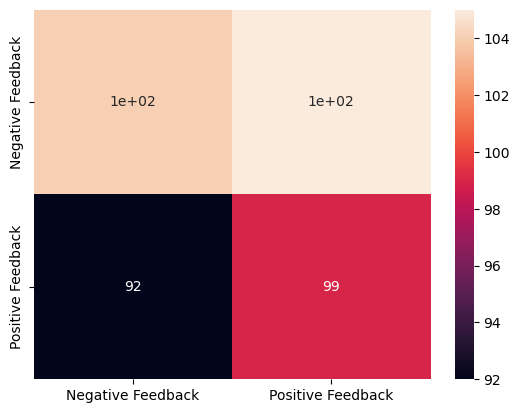

In [34]:
import seaborn as sns

cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])

# Unseen text - Prediction

In [35]:
review = 'nice movie'

input1=[review]

input_data = cv.transform(input1).toarray()
input_pred = guass_clf.predict(input_data)

if input_pred[0]==1:
    print('Review is Positive')
else:
    print('Review is Negative')

Review is Positive


In [36]:
review = 'long waiting time in the movie'

input1=[review]

input_data = cv.transform(input1).toarray()
input_pred = guass_clf.predict(input_data)

if input_pred[0]==1:
    print('Review is Positive')
else:
    print('Review is Negative')

Review is Positive
